# **BACKGROUND**  
There's a Supermarket in US, lets say the name is **PW Mart**. They sell many products ranging from meats, fishs, fruits, sweets, liquors, even golds. They have severall channel of purchase. People can come through an offline store, web store, or catalog store. They also have membership for their customers. This way, they can record some personal data of customers.

Usually, **Supermarket run campaigns to boost their sales and keep their customers engaged**. Supermarket usually do a season / theme based campaign. They usually integrate discounted items into a campaign to highlight the concept of the campaign.

Over the last year, PW Mart held a series of campaign. **They already run the campaign 6 times**. They can't really tell wheter **the campaign is working well or not**. They just run the campaign as it should be run. They already record the customers data based on their demographic, purchasing behavior, and participation in the campaign from their membership data for further analysis.

**PW Mart feel that their campaign is running on auto-pilot. The participant seems stagnant and only catch small percentage of their total customers. They want to run the next campaign with more tailored strategy based on experience data.**

**Supermarket Campaign Team, the one in Marketing Division of PW Mart**, they hire a Data Analyst to help them analyze the data they already gather for the last 2 years and design the base of their next campaign.

# **OBJECTIVE**
**To best formulate next campaign, we should should evaluate our campaign performance and compared to our data as general. By then, we might conclude and answer these key questions that shape a campaign:**
1. Based on experience, evaluate campaign participations!
2. Based on demographics, what's the best target audience?
3. Based on experience, is discount needed?
    - If needed, which products that should be discounted?
4. What channel of purchase should we integrate more in the campaign?


# **LOAD THE DATA**

In [463]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

In [464]:
#pd.set_option('display.max_rows', 100)
pd.reset_option('display.max_rows')

pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

pd.set_option('display.max_colwidth', 500)

In [465]:
dfStore = pd.read_csv('Supermarket Customers.csv', sep = '\t')
display(dfStore,
        dfStore.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


None

**There's a missing value on the data (income), the Dtype seems can be improved to match the real type that can ease the analysis step, the columns seem have to be renamed to ease the understanding**

# **DATA CLEANSING**

## **RENAME THE COLUMN -- GLOSSARY**

**By default, the data contains these columns**  
We think it's better to rename the columns to make the understanding easier later.

**PEOPLE**
- **ID:** Customer's unique identifier
- **Year_Birth:** Customer's birth year
- **Education:** Customer's education level
- **Marital_Status:** Customer's marital status
- **Income:** Customer's yearly household income
- **Kidhome:** Number of children in customer's household
- **Teenhome:** Number of teenagers in customer's household
- **Dt_Customer:** Date of customer's enrollment with the company
- **Recency:** Number of days since customer's last purchase
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise


**PRODUCT**
- **MntWines:** Amount spent on wine in last 2 years
- **MntFruits:** Amount spent on fruits in last 2 years
- **MntMeatProducts:** Amount spent on meat in last 2 years
- **MntFishProducts:** Amount spent on fish in last 2 years
- **MntSweetProducts:** Amount spent on sweets in last 2 years
- **MntGoldProds:** Amount spent on gold in last 2 years


**PROMOTION**
- **NumDealsPurchases:** Number of purchases made with a discount
- **AcceptedCmp1:** 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2:** 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4:** 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5:** 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- **Response:** 1 if the customer accepted the offer in the last campaign, 0 otherwise


**PLACE**
- **NumWebPurchases:** Number of purchases made through the company’s website
- **NumCatalogPurchases:** Number of purchases made using a catalog
- **NumStorePurchases:** Number of purchases made directly in stores
- **NumWebVisitsMonth:** Number of visits to the company’s website in the last month

In [466]:
dfStore = dfStore[['ID',
                    'Year_Birth',
                    'Education',
                    'Marital_Status',
                    'Income',
                    'Kidhome',
                    'Teenhome',
                    'Dt_Customer',
                    'Recency',
                    'Complain',
                    'MntWines',
                    'MntFruits',
                    'MntMeatProducts',
                    'MntFishProducts',
                    'MntSweetProducts',
                    'MntGoldProds',
                    'NumDealsPurchases',
                    'AcceptedCmp1',
                    'AcceptedCmp2',
                    'AcceptedCmp3',
                    'AcceptedCmp4',
                    'AcceptedCmp5',
                    'Response',
                    'NumWebVisitsMonth',
                    'NumWebPurchases',
                    'NumCatalogPurchases',
                    'NumStorePurchases',
                    'Z_CostContact',
                    'Z_Revenue']]

In [467]:
dfOrgCols = dfStore.columns.to_list()

dfNewCols = ['id',
             'birthYear',
             'education',
             'statusMarital',
             'yearlyHouseIncome',
             'inHomeKid',
             'inHomeTeen',
             'customerJoinDate',
             'daysLastPurchase',
             'isComplain2Y',
             'amountWines2Y',
             'amountFruits2Y',
             'amountMeatProds2Y',
             'amountFishProds2Y',
             'amountSweetProds2Y',
             'amountGoldProds2Y',
             'discPurchase',
             'isAcceptedCmp1',
             'isAcceptedCmp2',
             'isAcceptedCmp3',
             'isAcceptedCmp4',
             'isAcceptedCmp5',
             'isAcceptedCmpLast',
             'numWebVisitLastMonth',
             'numWebPurchase',
             'numCatalogPurchase',
             'numStorePurchase',
             'zCostContact',
             'zRevenue']

display(dfOrgCols, len(dfOrgCols),
        dfNewCols, len(dfNewCols))

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'Complain',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response',
 'NumWebVisitsMonth',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'Z_CostContact',
 'Z_Revenue']

29

['id',
 'birthYear',
 'education',
 'statusMarital',
 'yearlyHouseIncome',
 'inHomeKid',
 'inHomeTeen',
 'customerJoinDate',
 'daysLastPurchase',
 'isComplain2Y',
 'amountWines2Y',
 'amountFruits2Y',
 'amountMeatProds2Y',
 'amountFishProds2Y',
 'amountSweetProds2Y',
 'amountGoldProds2Y',
 'discPurchase',
 'isAcceptedCmp1',
 'isAcceptedCmp2',
 'isAcceptedCmp3',
 'isAcceptedCmp4',
 'isAcceptedCmp5',
 'isAcceptedCmpLast',
 'numWebVisitLastMonth',
 'numWebPurchase',
 'numCatalogPurchase',
 'numStorePurchase',
 'zCostContact',
 'zRevenue']

29

In [468]:
dfStore.rename(columns = dict(zip(dfOrgCols, dfNewCols)),
               inplace = True)

**The new columns will be:**  

**PEOPLE**
- **id:** Customer's unique identifier
- **birthYear:** Customer's birth year
- **education:** Customer's education level
- **statusMarital:** Customer's marital status
- **yearlyHouseIncome:** Customer's yearly household income
- **inHomeKid:** Number of children in customer's household
- **inHomeTeen:** Number of teenagers in customer's household
- **customerJoinDate:** Date of customer's enrollment with the company
- **daysLastPurchase:** Number of days since customer's last purchase
- **isComplain2Y:** 1 if the customer complained in the last 2 years, 0 otherwise


**PRODUCT**
- **amountWines2Y:** Amount spent on wine in last 2 years
- **amountFruits2Y:** Amount spent on fruits in last 2 years
- **amountMeatProds2Y:** Amount spent on meat in last 2 years
- **amountFishProds2Y:** Amount spent on fish in last 2 years
- **amountSweetProds2Y:** Amount spent on sweets in last 2 years
- **amountGoldProds2Y:** Amount spent on gold in last 2 years


**PROMOTION**
- **discPurchase:** Number of purchases made with a discount
- **isAcceptedCmp1:** 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- **isAcceptedCmp2:** 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- **isAcceptedCmp3:** 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- **isAcceptedCmp4:** 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- **isAcceptedCmp5:** 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- **isAcceptedCmpLast:** 1 if the customer accepted the offer in the last campaign, 0 otherwise


**PLACE**
- **numWebPurchase:** Number of purchases made through the company’s website
- **numCatalogPurchase:** Number of purchases made using a catalog
- **numStorePurchase:** Number of purchases made directly in stores
- **numWebVisitsMonth:** Number of visits to the company’s website in the last month

## **CHANGE FORMAT**

In [469]:
display(dfStore,
        dfStore.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2240 non-null   int64  
 1   birthYear             2240 non-null   int64  
 2   education             2240 non-null   object 
 3   statusMarital         2240 non-null   object 
 4   yearlyHouseIncome     2216 non-null   float64
 5   inHomeKid             2240 non-null   int64  
 6   inHomeTeen            2240 non-null   int64  
 7   customerJoinDate      2240 non-null   object 
 8   daysLastPurchase      2240 non-null   int64  
 9   isComplain2Y          2240 non-null   int64  
 10  amountWines2Y         2240 non-null   int64  
 11  amountFruits2Y        2240 non-null   int64  
 12  amountMeatProds2Y     2240 non-null   int64  
 13  amountFishProds2Y     2240 non-null   int64  
 14  amountSweetProds2Y    2240 non-null   int64  
 15  amountGoldProds2Y    

,id,birthYear,education,statusMarital,yearlyHouseIncome,inHomeKid,inHomeTeen,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,zCostContact,zRevenue
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,7,8,10,4,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,5,1,1,2,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,4,8,2,10,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,6,2,0,4,3,11
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,5,3,6,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,0,709,43,182,42,118,247,2,0,0,0,0,0,0,5,9,3,4,3,11
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,0,406,0,30,0,0,8,7,1,0,0,0,0,0,7,8,2,5,3,11
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,0,908,48,217,32,12,24,1,0,0,0,1,0,0,6,2,3,13,3,11
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,0,428,30,214,80,30,61,2,0,0,0,0,0,0,3,6,5,10,3,11


None

In [470]:
dfStore['customerJoinDate'] = pd.to_datetime(dfStore['customerJoinDate'], format='%d-%m-%Y')
dfStore

,id,birthYear,education,statusMarital,yearlyHouseIncome,inHomeKid,inHomeTeen,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,zCostContact,zRevenue
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,7,8,10,4,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,5,1,1,2,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,4,8,2,10,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,6,2,0,4,3,11
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,5,3,6,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,0,709,43,182,42,118,247,2,0,0,0,0,0,0,5,9,3,4,3,11
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,0,406,0,30,0,0,8,7,1,0,0,0,0,0,7,8,2,5,3,11
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,0,908,48,217,32,12,24,1,0,0,0,1,0,0,6,2,3,13,3,11
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,0,428,30,214,80,30,61,2,0,0,0,0,0,0,3,6,5,10,3,11


In [471]:
colToStrings = ['isComplain2Y','isAcceptedCmp1','isAcceptedCmp2','isAcceptedCmp3','isAcceptedCmp4','isAcceptedCmp5','isAcceptedCmpLast']
dfStore[colToStrings] = dfStore[colToStrings].apply(lambda x : x.astype('category'))
dfStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2240 non-null   int64         
 1   birthYear             2240 non-null   int64         
 2   education             2240 non-null   object        
 3   statusMarital         2240 non-null   object        
 4   yearlyHouseIncome     2216 non-null   float64       
 5   inHomeKid             2240 non-null   int64         
 6   inHomeTeen            2240 non-null   int64         
 7   customerJoinDate      2240 non-null   datetime64[ns]
 8   daysLastPurchase      2240 non-null   int64         
 9   isComplain2Y          2240 non-null   category      
 10  amountWines2Y         2240 non-null   int64         
 11  amountFruits2Y        2240 non-null   int64         
 12  amountMeatProds2Y     2240 non-null   int64         
 13  amountFishProds2Y 

## **TIMEFRAME TO ASSUME**

In [472]:
display('max', dfStore['customerJoinDate'].max(),
        'min', dfStore['customerJoinDate'].min())

'max'

Timestamp('2014-06-29 00:00:00')

'min'

Timestamp('2012-07-30 00:00:00')

In [473]:
dfStore[dfStore['customerJoinDate'] == '2014-06-29']

,id,birthYear,education,statusMarital,yearlyHouseIncome,inHomeKid,inHomeTeen,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,zCostContact,zRevenue
200,7300,1952,Graduation,Divorced,69142.0,0,1,2014-06-29,50,0,448,4,34,6,4,39,3,0,0,0,1,0,0,5,8,1,7,3,11
989,453,1956,PhD,Widow,35340.0,1,1,2014-06-29,1,0,27,0,12,0,1,5,2,0,0,0,0,0,0,5,2,0,3,3,11


**Every data is last 2 years**  
### **TODAY IS assumed 2015-01, because recency of last customerJoinDate is quite high**

## **CHECK MISSING VALUES**

In [474]:
dfStore.isna().sum()

id                       0
birthYear                0
education                0
statusMarital            0
yearlyHouseIncome       24
inHomeKid                0
inHomeTeen               0
customerJoinDate         0
daysLastPurchase         0
isComplain2Y             0
amountWines2Y            0
amountFruits2Y           0
amountMeatProds2Y        0
amountFishProds2Y        0
amountSweetProds2Y       0
amountGoldProds2Y        0
discPurchase             0
isAcceptedCmp1           0
isAcceptedCmp2           0
isAcceptedCmp3           0
isAcceptedCmp4           0
isAcceptedCmp5           0
isAcceptedCmpLast        0
numWebVisitLastMonth     0
numWebPurchase           0
numCatalogPurchase       0
numStorePurchase         0
zCostContact             0
zRevenue                 0
dtype: int64

<Axes: xlabel='yearlyHouseIncome', ylabel='Count'>

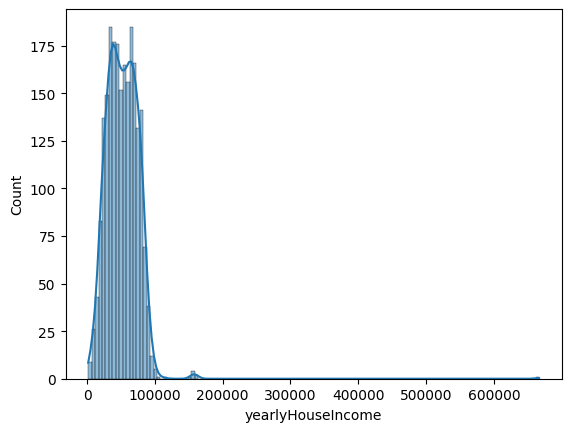

In [475]:
display(sns.histplot(dfStore[dfStore['yearlyHouseIncome'].notnull()]['yearlyHouseIncome'],
             kde=True))

In [476]:
display('mean', dfStore['yearlyHouseIncome'].mean(),
        'median', dfStore['yearlyHouseIncome'].median())

'mean'

52247.25135379061

'median'

51381.5

In [477]:
normaltest(dfStore[dfStore['yearlyHouseIncome'].notnull()]['yearlyHouseIncome'])

NormaltestResult(statistic=2943.373569541277, pvalue=0.0)

**Yearly income data is not normally distributed**  
Maybe because of the outliers

In [478]:
Q1Yhi = dfStore['yearlyHouseIncome'].quantile(0.25)
Q3Yhi = dfStore['yearlyHouseIncome'].quantile(0.75)
IQRYhi = Q3Yhi - Q1Yhi
display(Q1Yhi,Q3Yhi,IQRYhi)

outliersYhi = dfStore[(dfStore['yearlyHouseIncome'] < Q1Yhi - 1.5 * IQRYhi) | (dfStore['yearlyHouseIncome'] > Q3Yhi + 1.5 * IQRYhi)]
outliersYhi

nonOutliersYhi = dfStore[~((dfStore['yearlyHouseIncome'] < Q1Yhi - 1.5 * IQRYhi) | (dfStore['yearlyHouseIncome'] > Q3Yhi + 1.5 * IQRYhi))]
nonOutliersYhi
display(outliersYhi,
        nonOutliersYhi)

35303.0

68522.0

33219.0

,id,birthYear,education,statusMarital,yearlyHouseIncome,inHomeKid,inHomeTeen,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,zCostContact,zRevenue
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,0,20,2,1582,1,2,1,15,0,0,0,0,0,0,0,0,22,0,3,11
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,0,85,1,16,2,1,2,0,0,0,0,0,0,0,1,0,0,1,3,11
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,0,55,16,1622,17,3,4,15,0,0,0,0,0,0,0,0,28,1,3,11
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,0,39,1,9,2,0,8,0,0,0,0,0,0,0,1,1,0,1,3,11
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,0,1,0,1725,2,1,1,0,0,0,0,0,0,0,1,0,28,0,3,11
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,0,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,0,9,14,18,8,1,12,4,0,0,0,0,0,0,6,3,1,3,3,11


,id,birthYear,education,statusMarital,yearlyHouseIncome,inHomeKid,inHomeTeen,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,zCostContact,zRevenue
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,7,8,10,4,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,5,1,1,2,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,4,8,2,10,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,6,2,0,4,3,11
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,5,3,6,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,0,709,43,182,42,118,247,2,0,0,0,0,0,0,5,9,3,4,3,11
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,0,406,0,30,0,0,8,7,1,0,0,0,0,0,7,8,2,5,3,11
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,0,908,48,217,32,12,24,1,0,0,0,1,0,0,6,2,3,13,3,11
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,0,428,30,214,80,30,61,2,0,0,0,0,0,0,3,6,5,10,3,11


**We can try to define and take out the outliers**

<Axes: xlabel='yearlyHouseIncome', ylabel='Count'>

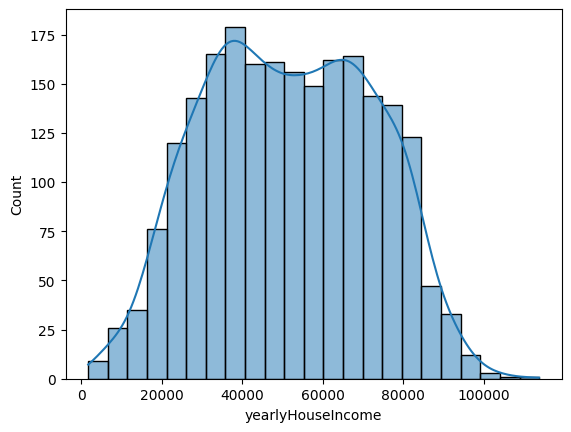

In [479]:
display(sns.histplot(nonOutliersYhi[nonOutliersYhi['yearlyHouseIncome'].notnull()]['yearlyHouseIncome'],
             kde=True))

In [480]:
display(nonOutliersYhi['yearlyHouseIncome'].mean(),
        nonOutliersYhi['yearlyHouseIncome'].median())

51633.63813405797

51301.0

In [481]:
normaltest(nonOutliersYhi[nonOutliersYhi['yearlyHouseIncome'].notnull()]['yearlyHouseIncome'])

NormaltestResult(statistic=231.54588203992873, pvalue=5.2535220730746056e-51)

**Finally we get the non-Outliers data. As we can see here, the data looks like a bell shape but has two mountains.**  
The Mean and Median values are also quite similar.  
But, when we do normal test, it says that it's **not a normally distributed data.**

## **FILL WITH MEDIAN (Per Education) - YEARLY INCOME**

**We can fill missing values in Yearly Income by using Median Income per Education**  
Because income usually have correlation to education.

In [482]:
display(np.sort(dfStore['education'].unique()),
        dfStore['education'].value_counts().sort_index().values,
        dfStore['education'].value_counts().sort_index())

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

array([ 203,   54, 1127,  370,  486])

2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: education, dtype: int64

In [483]:
dfStore.loc[(dfStore['yearlyHouseIncome'].isna()) & (dfStore['education'] == 'Graduation'), 'yearlyHouseIncome']
dfStore[dfStore['education'] == 'Graduation']['yearlyHouseIncome'].median()

52028.5

In [484]:
for i in dfStore['education'].unique() :
    dfStore.loc[(dfStore['yearlyHouseIncome'].isna()) & (dfStore['education'] == i), 'yearlyHouseIncome'] = dfStore[dfStore['education'] == i]['yearlyHouseIncome'].median()
dfStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2240 non-null   int64         
 1   birthYear             2240 non-null   int64         
 2   education             2240 non-null   object        
 3   statusMarital         2240 non-null   object        
 4   yearlyHouseIncome     2240 non-null   float64       
 5   inHomeKid             2240 non-null   int64         
 6   inHomeTeen            2240 non-null   int64         
 7   customerJoinDate      2240 non-null   datetime64[ns]
 8   daysLastPurchase      2240 non-null   int64         
 9   isComplain2Y          2240 non-null   category      
 10  amountWines2Y         2240 non-null   int64         
 11  amountFruits2Y        2240 non-null   int64         
 12  amountMeatProds2Y     2240 non-null   int64         
 13  amountFishProds2Y 

## **INCOME GROUPING**

**Income Class**  
based on https://en.wikipedia.org/wiki/Household_income_in_the_United_States  
Academic class models  
William Thompson & Joseph Hickey, 2005

In [485]:
def incomeGrouper(x) :
    if x > 500000 :
        return 'Upper Class'
    elif x >= 100000 and x <= 500000 :
        return 'Upper Middle Class'
    elif x >= 35000 and x < 100000 :
        return 'Lower Middle Class'
    elif x >= 16000 and x < 35000 :
        return 'Working Class'
    elif x < 16000 :
        return 'Lower Class'

In [486]:
dfStore.insert(5,'ecoClass',dfStore['yearlyHouseIncome'].apply(incomeGrouper))
dfStore

,id,birthYear,education,statusMarital,yearlyHouseIncome,ecoClass,inHomeKid,inHomeTeen,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,zCostContact,zRevenue
0,5524,1957,Graduation,Single,58138.0,Lower Middle Class,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,7,8,10,4,3,11
1,2174,1954,Graduation,Single,46344.0,Lower Middle Class,1,1,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,5,1,1,2,3,11
2,4141,1965,Graduation,Together,71613.0,Lower Middle Class,0,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,4,8,2,10,3,11
3,6182,1984,Graduation,Together,26646.0,Working Class,1,0,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,6,2,0,4,3,11
4,5324,1981,PhD,Married,58293.0,Lower Middle Class,1,0,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,5,3,6,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,Lower Middle Class,0,1,2013-06-13,46,0,709,43,182,42,118,247,2,0,0,0,0,0,0,5,9,3,4,3,11
2236,4001,1946,PhD,Together,64014.0,Lower Middle Class,2,1,2014-06-10,56,0,406,0,30,0,0,8,7,1,0,0,0,0,0,7,8,2,5,3,11
2237,7270,1981,Graduation,Divorced,56981.0,Lower Middle Class,0,0,2014-01-25,91,0,908,48,217,32,12,24,1,0,0,0,1,0,0,6,2,3,13,3,11
2238,8235,1956,Master,Together,69245.0,Lower Middle Class,0,1,2014-01-24,8,0,428,30,214,80,30,61,2,0,0,0,0,0,0,3,6,5,10,3,11


**We should group income into categories to make a demography analysis**  
So we can conclude which category has impact to the analysis

## **CHECK BIRTHYEAR**

In [487]:
np.sort(dfStore['birthYear'].unique())

array([1893, 1899, 1900, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996])

In [488]:
dfStore[dfStore['birthYear'].isin([1893,1899,1900])]

,id,birthYear,education,statusMarital,yearlyHouseIncome,ecoClass,inHomeKid,inHomeTeen,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,zCostContact,zRevenue
192,7829,1900,2n Cycle,Divorced,36640.0,Lower Middle Class,1,0,2013-09-26,99,1,15,6,8,7,4,25,1,0,0,0,0,0,0,5,2,1,2,3,11
239,11004,1893,2n Cycle,Single,60182.0,Lower Middle Class,0,1,2014-05-17,23,0,8,0,5,7,0,2,1,0,0,0,0,0,0,4,1,0,2,3,11
339,1150,1899,PhD,Together,83532.0,Lower Middle Class,0,0,2013-09-26,36,0,755,144,562,104,64,224,1,0,0,0,0,1,0,1,4,6,4,3,11


**Generations Class**  
based on https://journeymatters.ai/7-generations/

In [489]:
def yearDefiner(x) :
    if x <= 1924 :
        return 'Greatest Generation'
    elif x >= 1925 and x <= 1945 :
        return 'Silent Generation'
    elif x >= 1946 and x <= 1964 :
        return 'Baby Boomers'
    elif x >= 1965 and x <= 1980 :
        return 'Gen X'
    elif x >= 1981 and x <= 1996 :
        return 'Millennials'
    elif x >= 1997 and x <= 2012 :
        return 'Gen Z'
    elif x >= 2013 and x <= 2025 :
        return 'Gen A'

In [490]:
dfStore.insert(2,'generation',dfStore['birthYear'].apply(yearDefiner))
dfStore

,id,birthYear,generation,education,statusMarital,yearlyHouseIncome,ecoClass,inHomeKid,inHomeTeen,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,zCostContact,zRevenue
0,5524,1957,Baby Boomers,Graduation,Single,58138.0,Lower Middle Class,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,7,8,10,4,3,11
1,2174,1954,Baby Boomers,Graduation,Single,46344.0,Lower Middle Class,1,1,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,5,1,1,2,3,11
2,4141,1965,Gen X,Graduation,Together,71613.0,Lower Middle Class,0,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,4,8,2,10,3,11
3,6182,1984,Millennials,Graduation,Together,26646.0,Working Class,1,0,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,6,2,0,4,3,11
4,5324,1981,Millennials,PhD,Married,58293.0,Lower Middle Class,1,0,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,5,3,6,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Gen X,Graduation,Married,61223.0,Lower Middle Class,0,1,2013-06-13,46,0,709,43,182,42,118,247,2,0,0,0,0,0,0,5,9,3,4,3,11
2236,4001,1946,Baby Boomers,PhD,Together,64014.0,Lower Middle Class,2,1,2014-06-10,56,0,406,0,30,0,0,8,7,1,0,0,0,0,0,7,8,2,5,3,11
2237,7270,1981,Millennials,Graduation,Divorced,56981.0,Lower Middle Class,0,0,2014-01-25,91,0,908,48,217,32,12,24,1,0,0,0,1,0,0,6,2,3,13,3,11
2238,8235,1956,Baby Boomers,Master,Together,69245.0,Lower Middle Class,0,1,2014-01-24,8,0,428,30,214,80,30,61,2,0,0,0,0,0,0,3,6,5,10,3,11


**We should group birthyear into Generation categories to make a demography analysis**  
So we can conclude which category has impact to the analysis, which generation gives high impact

## **CHECK IS FAMILY**

In [491]:
dfStore.insert(9,'isFamily', np.where((dfStore['inHomeKid'] + dfStore['inHomeTeen']) == 0, 'Not Family', 'Family'))
dfStore

,id,birthYear,generation,education,statusMarital,yearlyHouseIncome,ecoClass,inHomeKid,inHomeTeen,isFamily,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,zCostContact,zRevenue
0,5524,1957,Baby Boomers,Graduation,Single,58138.0,Lower Middle Class,0,0,Not Family,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,7,8,10,4,3,11
1,2174,1954,Baby Boomers,Graduation,Single,46344.0,Lower Middle Class,1,1,Family,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,5,1,1,2,3,11
2,4141,1965,Gen X,Graduation,Together,71613.0,Lower Middle Class,0,0,Not Family,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,4,8,2,10,3,11
3,6182,1984,Millennials,Graduation,Together,26646.0,Working Class,1,0,Family,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,6,2,0,4,3,11
4,5324,1981,Millennials,PhD,Married,58293.0,Lower Middle Class,1,0,Family,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,5,3,6,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Gen X,Graduation,Married,61223.0,Lower Middle Class,0,1,Family,2013-06-13,46,0,709,43,182,42,118,247,2,0,0,0,0,0,0,5,9,3,4,3,11
2236,4001,1946,Baby Boomers,PhD,Together,64014.0,Lower Middle Class,2,1,Family,2014-06-10,56,0,406,0,30,0,0,8,7,1,0,0,0,0,0,7,8,2,5,3,11
2237,7270,1981,Millennials,Graduation,Divorced,56981.0,Lower Middle Class,0,0,Not Family,2014-01-25,91,0,908,48,217,32,12,24,1,0,0,0,1,0,0,6,2,3,13,3,11
2238,8235,1956,Baby Boomers,Master,Together,69245.0,Lower Middle Class,0,1,Family,2014-01-24,8,0,428,30,214,80,30,61,2,0,0,0,0,0,0,3,6,5,10,3,11


**We can make a new column to process the inHomeKid and inHomeTeen columns**  
It is created to define which customer has children in their household.  
To make it simple, we label it as 'Family' (has children in household) and 'Not Family' (don't have children in household)

## **TOTAL AMOUNT SPENT**

In [492]:
dfStore.insert(19, 'amountTotalSpent', dfStore[['amountWines2Y','amountFruits2Y','amountMeatProds2Y','amountFishProds2Y','amountSweetProds2Y','amountGoldProds2Y']].sum(axis = 1))
dfStore

,id,birthYear,generation,education,statusMarital,yearlyHouseIncome,ecoClass,inHomeKid,inHomeTeen,isFamily,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,amountTotalSpent,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,zCostContact,zRevenue
0,5524,1957,Baby Boomers,Graduation,Single,58138.0,Lower Middle Class,0,0,Not Family,2012-09-04,58,0,635,88,546,172,88,88,1617,3,0,0,0,0,0,1,7,8,10,4,3,11
1,2174,1954,Baby Boomers,Graduation,Single,46344.0,Lower Middle Class,1,1,Family,2014-03-08,38,0,11,1,6,2,1,6,27,2,0,0,0,0,0,0,5,1,1,2,3,11
2,4141,1965,Gen X,Graduation,Together,71613.0,Lower Middle Class,0,0,Not Family,2013-08-21,26,0,426,49,127,111,21,42,776,1,0,0,0,0,0,0,4,8,2,10,3,11
3,6182,1984,Millennials,Graduation,Together,26646.0,Working Class,1,0,Family,2014-02-10,26,0,11,4,20,10,3,5,53,2,0,0,0,0,0,0,6,2,0,4,3,11
4,5324,1981,Millennials,PhD,Married,58293.0,Lower Middle Class,1,0,Family,2014-01-19,94,0,173,43,118,46,27,15,422,5,0,0,0,0,0,0,5,5,3,6,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Gen X,Graduation,Married,61223.0,Lower Middle Class,0,1,Family,2013-06-13,46,0,709,43,182,42,118,247,1341,2,0,0,0,0,0,0,5,9,3,4,3,11
2236,4001,1946,Baby Boomers,PhD,Together,64014.0,Lower Middle Class,2,1,Family,2014-06-10,56,0,406,0,30,0,0,8,444,7,1,0,0,0,0,0,7,8,2,5,3,11
2237,7270,1981,Millennials,Graduation,Divorced,56981.0,Lower Middle Class,0,0,Not Family,2014-01-25,91,0,908,48,217,32,12,24,1241,1,0,0,0,1,0,0,6,2,3,13,3,11
2238,8235,1956,Baby Boomers,Master,Together,69245.0,Lower Middle Class,0,1,Family,2014-01-24,8,0,428,30,214,80,30,61,843,2,0,0,0,0,0,0,3,6,5,10,3,11


**Later, we might calculate the total spending per customer**  
To make that process easier, we create new column that contains sum of spending per customer.

## **TOTAL PARTICIPATION**

In [493]:
dfStore.insert(27, 'freqParticipationCmp', dfStore[['isAcceptedCmp1','isAcceptedCmp2','isAcceptedCmp3','isAcceptedCmp4','isAcceptedCmp5','isAcceptedCmpLast']].sum(axis = 1))
dfStore

,id,birthYear,generation,education,statusMarital,yearlyHouseIncome,ecoClass,inHomeKid,inHomeTeen,isFamily,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,amountTotalSpent,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,freqParticipationCmp,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,zCostContact,zRevenue
0,5524,1957,Baby Boomers,Graduation,Single,58138.0,Lower Middle Class,0,0,Not Family,2012-09-04,58,0,635,88,546,172,88,88,1617,3,0,0,0,0,0,1,1.0,7,8,10,4,3,11
1,2174,1954,Baby Boomers,Graduation,Single,46344.0,Lower Middle Class,1,1,Family,2014-03-08,38,0,11,1,6,2,1,6,27,2,0,0,0,0,0,0,0.0,5,1,1,2,3,11
2,4141,1965,Gen X,Graduation,Together,71613.0,Lower Middle Class,0,0,Not Family,2013-08-21,26,0,426,49,127,111,21,42,776,1,0,0,0,0,0,0,0.0,4,8,2,10,3,11
3,6182,1984,Millennials,Graduation,Together,26646.0,Working Class,1,0,Family,2014-02-10,26,0,11,4,20,10,3,5,53,2,0,0,0,0,0,0,0.0,6,2,0,4,3,11
4,5324,1981,Millennials,PhD,Married,58293.0,Lower Middle Class,1,0,Family,2014-01-19,94,0,173,43,118,46,27,15,422,5,0,0,0,0,0,0,0.0,5,5,3,6,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Gen X,Graduation,Married,61223.0,Lower Middle Class,0,1,Family,2013-06-13,46,0,709,43,182,42,118,247,1341,2,0,0,0,0,0,0,0.0,5,9,3,4,3,11
2236,4001,1946,Baby Boomers,PhD,Together,64014.0,Lower Middle Class,2,1,Family,2014-06-10,56,0,406,0,30,0,0,8,444,7,1,0,0,0,0,0,1.0,7,8,2,5,3,11
2237,7270,1981,Millennials,Graduation,Divorced,56981.0,Lower Middle Class,0,0,Not Family,2014-01-25,91,0,908,48,217,32,12,24,1241,1,0,0,0,1,0,0,1.0,6,2,3,13,3,11
2238,8235,1956,Baby Boomers,Master,Together,69245.0,Lower Middle Class,0,1,Family,2014-01-24,8,0,428,30,214,80,30,61,843,2,0,0,0,0,0,0,0.0,3,6,5,10,3,11


**Campaign participation is the main variable in this analysis**  
The colums are separated based on each campaign.  
Later, we should count participation in total per customer to make analysis per demography / other categories.  
So, we should create a new column that contains sum participation per customer to make the analysis easier.

In [494]:
dfStore['freqParticipationCmp'].value_counts()

0.0    1631
1.0     370
2.0     142
3.0      51
4.0      36
5.0      10
Name: freqParticipationCmp, dtype: int64

## **TOTAL TIMES PURCHASE**

In [495]:
dfStore.insert(32, 'freqPurchase', dfStore[dfStore.columns[-5:-2].to_list()].sum(axis = 1))
dfStore

,id,birthYear,generation,education,statusMarital,yearlyHouseIncome,ecoClass,inHomeKid,inHomeTeen,isFamily,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,amountTotalSpent,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,freqParticipationCmp,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,freqPurchase,zCostContact,zRevenue
0,5524,1957,Baby Boomers,Graduation,Single,58138.0,Lower Middle Class,0,0,Not Family,2012-09-04,58,0,635,88,546,172,88,88,1617,3,0,0,0,0,0,1,1.0,7,8,10,4,22,3,11
1,2174,1954,Baby Boomers,Graduation,Single,46344.0,Lower Middle Class,1,1,Family,2014-03-08,38,0,11,1,6,2,1,6,27,2,0,0,0,0,0,0,0.0,5,1,1,2,4,3,11
2,4141,1965,Gen X,Graduation,Together,71613.0,Lower Middle Class,0,0,Not Family,2013-08-21,26,0,426,49,127,111,21,42,776,1,0,0,0,0,0,0,0.0,4,8,2,10,20,3,11
3,6182,1984,Millennials,Graduation,Together,26646.0,Working Class,1,0,Family,2014-02-10,26,0,11,4,20,10,3,5,53,2,0,0,0,0,0,0,0.0,6,2,0,4,6,3,11
4,5324,1981,Millennials,PhD,Married,58293.0,Lower Middle Class,1,0,Family,2014-01-19,94,0,173,43,118,46,27,15,422,5,0,0,0,0,0,0,0.0,5,5,3,6,14,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Gen X,Graduation,Married,61223.0,Lower Middle Class,0,1,Family,2013-06-13,46,0,709,43,182,42,118,247,1341,2,0,0,0,0,0,0,0.0,5,9,3,4,16,3,11
2236,4001,1946,Baby Boomers,PhD,Together,64014.0,Lower Middle Class,2,1,Family,2014-06-10,56,0,406,0,30,0,0,8,444,7,1,0,0,0,0,0,1.0,7,8,2,5,15,3,11
2237,7270,1981,Millennials,Graduation,Divorced,56981.0,Lower Middle Class,0,0,Not Family,2014-01-25,91,0,908,48,217,32,12,24,1241,1,0,0,0,1,0,0,1.0,6,2,3,13,18,3,11
2238,8235,1956,Baby Boomers,Master,Together,69245.0,Lower Middle Class,0,1,Family,2014-01-24,8,0,428,30,214,80,30,61,843,2,0,0,0,0,0,0,0.0,3,6,5,10,21,3,11


**We can also make sum count for total times purchase for all channel used**  
By then, we can know directly frequency of purchase per customer.  
It can make it easier if we want to know, let's say, which category has highest purchase frequency

## **DROP OBVIOUS UNNECESSARY COLUMNS**

In [496]:
display(dfStore['zCostContact'].value_counts(),
        dfStore['zRevenue'].value_counts())

3    2240
Name: zCostContact, dtype: int64

11    2240
Name: zRevenue, dtype: int64

In [497]:
dfStore.drop(dfStore.columns[-2:],axis=1,inplace=True)

**All the values are same and don't describes anything usefull**  
The columns are also not described in the glossary by user  
So, we can drop those 2 columns: 'zCostContact' & 'zRevenue'

# **DATA ANALYSIS : CAMPAIGN DEMOGRAPHY**

In [498]:
display(dfStore,
        dfStore.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2240 non-null   int64         
 1   birthYear             2240 non-null   int64         
 2   generation            2240 non-null   object        
 3   education             2240 non-null   object        
 4   statusMarital         2240 non-null   object        
 5   yearlyHouseIncome     2240 non-null   float64       
 6   ecoClass              2240 non-null   object        
 7   inHomeKid             2240 non-null   int64         
 8   inHomeTeen            2240 non-null   int64         
 9   isFamily              2240 non-null   object        
 10  customerJoinDate      2240 non-null   datetime64[ns]
 11  daysLastPurchase      2240 non-null   int64         
 12  isComplain2Y          2240 non-null   category      
 13  amountWines2Y     

,id,birthYear,generation,education,statusMarital,yearlyHouseIncome,ecoClass,inHomeKid,inHomeTeen,isFamily,customerJoinDate,daysLastPurchase,isComplain2Y,amountWines2Y,amountFruits2Y,amountMeatProds2Y,amountFishProds2Y,amountSweetProds2Y,amountGoldProds2Y,amountTotalSpent,discPurchase,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast,freqParticipationCmp,numWebVisitLastMonth,numWebPurchase,numCatalogPurchase,numStorePurchase,freqPurchase
0,5524,1957,Baby Boomers,Graduation,Single,58138.0,Lower Middle Class,0,0,Not Family,2012-09-04,58,0,635,88,546,172,88,88,1617,3,0,0,0,0,0,1,1.0,7,8,10,4,22
1,2174,1954,Baby Boomers,Graduation,Single,46344.0,Lower Middle Class,1,1,Family,2014-03-08,38,0,11,1,6,2,1,6,27,2,0,0,0,0,0,0,0.0,5,1,1,2,4
2,4141,1965,Gen X,Graduation,Together,71613.0,Lower Middle Class,0,0,Not Family,2013-08-21,26,0,426,49,127,111,21,42,776,1,0,0,0,0,0,0,0.0,4,8,2,10,20
3,6182,1984,Millennials,Graduation,Together,26646.0,Working Class,1,0,Family,2014-02-10,26,0,11,4,20,10,3,5,53,2,0,0,0,0,0,0,0.0,6,2,0,4,6
4,5324,1981,Millennials,PhD,Married,58293.0,Lower Middle Class,1,0,Family,2014-01-19,94,0,173,43,118,46,27,15,422,5,0,0,0,0,0,0,0.0,5,5,3,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Gen X,Graduation,Married,61223.0,Lower Middle Class,0,1,Family,2013-06-13,46,0,709,43,182,42,118,247,1341,2,0,0,0,0,0,0,0.0,5,9,3,4,16
2236,4001,1946,Baby Boomers,PhD,Together,64014.0,Lower Middle Class,2,1,Family,2014-06-10,56,0,406,0,30,0,0,8,444,7,1,0,0,0,0,0,1.0,7,8,2,5,15
2237,7270,1981,Millennials,Graduation,Divorced,56981.0,Lower Middle Class,0,0,Not Family,2014-01-25,91,0,908,48,217,32,12,24,1241,1,0,0,0,1,0,0,1.0,6,2,3,13,18
2238,8235,1956,Baby Boomers,Master,Together,69245.0,Lower Middle Class,0,1,Family,2014-01-24,8,0,428,30,214,80,30,61,843,2,0,0,0,0,0,0,0.0,3,6,5,10,21


None

In [721]:
# dfStore.to_csv('dfStore.csv')

**We start by looking at our cleansed data to make sure and checked if there's still anything to be cleansed**  
Then, we can start our analysis by looking for the main problem.

## **CAMPAIGN PARTICIPATION**

**Let's evaluate campaign participation in general to find our problem in past campaigns**

In [499]:
cmp1To5Col = ['isAcceptedCmp1','isAcceptedCmp2','isAcceptedCmp3','isAcceptedCmp4','isAcceptedCmp5']
cmpAllCol = ['isAcceptedCmp1','isAcceptedCmp2','isAcceptedCmp3','isAcceptedCmp4','isAcceptedCmp5','isAcceptedCmpLast']

In [500]:
countPartiAllCol = pd.DataFrame()

for col in cmpAllCol:
    counts = dfStore[col].value_counts()
    countPartiAllCol[col] = counts

countPartiAllCol


,isAcceptedCmp1,isAcceptedCmp2,isAcceptedCmp3,isAcceptedCmp4,isAcceptedCmp5,isAcceptedCmpLast
0,2096,2210,2077,2073,2077,1906
1,144,30,163,167,163,334


In [501]:
countPartiAllColT = dfStore[['isAcceptedCmp1','isAcceptedCmp2','isAcceptedCmp3','isAcceptedCmp4','isAcceptedCmp5','isAcceptedCmpLast']].apply(pd.value_counts).transpose()
countPartiAllColT

,0,1
isAcceptedCmp1,2096,144
isAcceptedCmp2,2210,30
isAcceptedCmp3,2077,163
isAcceptedCmp4,2073,167
isAcceptedCmp5,2077,163
isAcceptedCmpLast,1906,334


**First, we must count total participation in each campaign**
- 0, as the data desribed before in glossary, represents that the participant **didn't participate in the campaign**.  
- 1, represents that the participant **did participate in the campaign**.

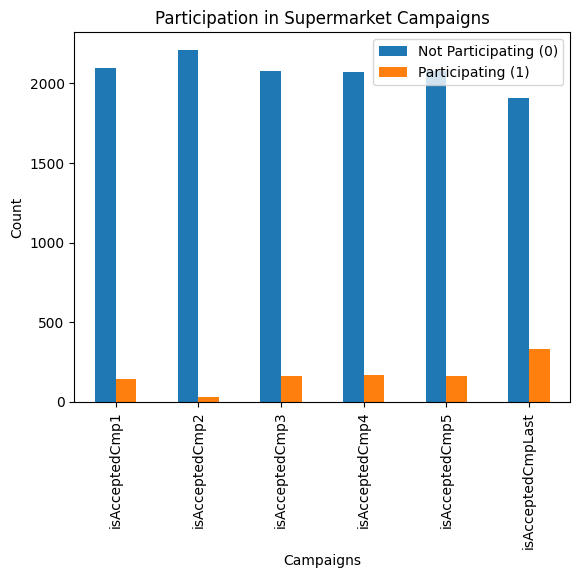

In [502]:
countPartiAllColT.plot(kind='bar')
plt.xlabel('Campaigns')
plt.ylabel('Count')
plt.title('Participation in Supermarket Campaigns')
plt.legend(['Not Participating (0)', 'Participating (1)'])
plt.xticks(rotation = 90)
plt.show()

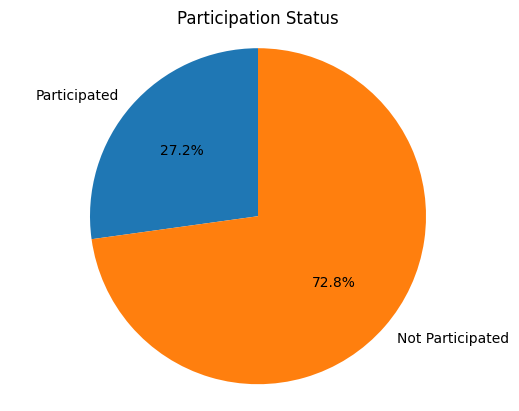

In [729]:
dictParticipated = {'type' : ['Participated' , 'Not Participated'],
                    'count' : [dfStore[dfStore['freqParticipationCmp'] != 0]['id'].count(),dfStore[dfStore['freqParticipationCmp'] == 0]['id'].count()]}
hasParticipated = pd.DataFrame(dictParticipated)
plt.pie(hasParticipated['count'], labels=hasParticipated['type'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Participation Status')
plt.show()

,type,count
0,Participated,1.643678
1,Not Participated,3.356322


<Axes: >

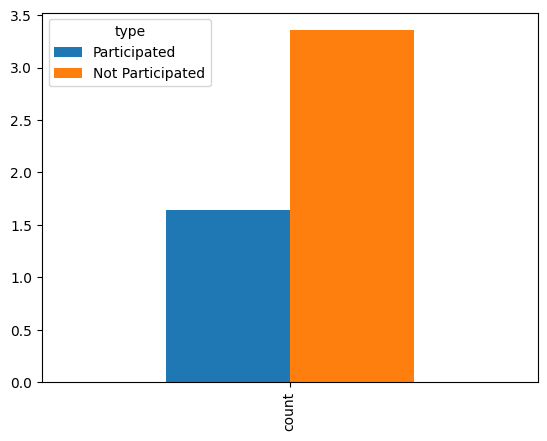

In [752]:
dictParticipationRate = {'type' : ['Participated' , 'Not Participated'],
                         'count' : [dfStore[dfStore['freqParticipationCmp'] != 0]['freqParticipationCmp'].mean(), 5 - dfStore[dfStore['freqParticipationCmp'] != 0]['freqParticipationCmp'].mean()]}
allParticipationRate = pd.DataFrame(dictParticipationRate)
display(allParticipationRate)
allParticipationRate.set_index('type').transpose().plot.bar(stacked=False)

### **The Problems**  
***So many customers didn't participate in the campaigns.* and only 27% has ever participated**  
But, if we look closely in participated customers number, there's a hope that this campaigns could work better next time.
In the last campaigns, we see a significance rise in participants, doubles the last and overall past campaigns participants.

To best formulate next campaign, we should design the campaign carefully based our evaluation of past campaigns.

We should see what might happened in last campaign to formulate next campaigns.
And also, looks at 2nd campaigns that failed to gather participants, so we're not repeating same mistake in next campaigns.

Based on our given data,  
We can see the demographics for potential target audience, so many will participate in next campaign.  
We can try to integrate discount into campaign.  
We can boost one of our channel of purchase for effective campaign.

**First thing first, we should decide who's our best target audience?**

## **DEMOGRAPHIC EDA**

**Based on our given data, we can do some demographic analysis**  
We can analyze through Generation, Education, Marital, Ecomonic Class, Family categories.  
We will try to find what happened there based on the proportion and find the best option for each demography type.

### **GENERATION**

**We will try to find which generation participate most in the campaign to see the problems that happened and what are the best generation to be targeted in the next campaign**

([<matplotlib.patches.Wedge at 0x144f1cdd0>,
 [Text(0.0786130431084146, 1.0971873082811496, 'Gen X'),
  Text(-0.6651410072872863, -0.8761206768618434, 'Baby Boomers'),
  Text(0.8980087857147295, -0.6352796398273419, 'Millennials'),
  Text(1.0990264779056393, -0.046268789289601514, 'Silent Generation'),
  Text(1.099990263165153, -0.004628276337676231, 'Greatest Generation')],
 [Text(0.042879841695498876, 0.5984658045169907, '47.7%'),
  Text(-0.3628041857930652, -0.4778840055610054, '33.9%'),
  Text(0.489822974026216, -0.3465161671785501, '17.2%'),
  Text(0.5994689879485304, -0.02523752143069173, '1.1%'),
  Text(0.5999946889991743, -0.002524514366005217, '0.1%')])

Gen X                  1069
Baby Boomers            759
Millennials             385
Silent Generation        24
Greatest Generation       3
Name: generation, dtype: int64

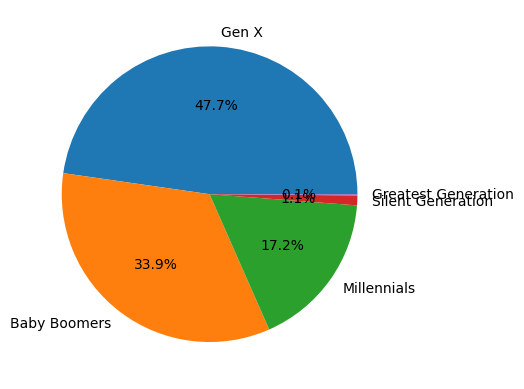

In [503]:
catGen = dfStore['generation'].value_counts()
display(plt.pie(catGen,
                labels=catGen.index,
                autopct='%1.1f%%'),
        catGen)

**3 Biggest Gen Pool**  
1. Gen X >> 47% / 1069 People
2. Baby Boomers >> 34% / 759 People
3. Millennials >> 17% / 385 People

These are the most potential generation to be targeted in the next campaign

#### **COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION**

**We should look into composition of participants per campaign**  
This way, we can tell which is the most potential generation to target and which generation gives interest to past campaigns

In [504]:
# CARA 1 lebih singkat dan jelas, tapi indexing berantakan
# allGenProp = dfStore.groupby('generation')[cmpAllCol].agg(['value_counts'])
# allGenProp = allGenProp.loc[allGenProp.index.get_level_values('isAcceptedCmp1') == 1].transpose()
# allGenProp

In [505]:
# allGenProp.plot(kind='bar', stacked=True)
# plt.xticks(rotation = 90)
# plt.show()

In [645]:
# CARA 2 tapi panjang tapi indexing rapih
crossTabGenCmp1 = pd.crosstab(index = dfStore['generation'],
                          columns= dfStore['isAcceptedCmp1']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabGenCmp2 = pd.crosstab(index = dfStore['generation'],
                          columns= dfStore['isAcceptedCmp2']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabGenCmp3 = pd.crosstab(index = dfStore['generation'],
                          columns= dfStore['isAcceptedCmp3']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabGenCmp4 = pd.crosstab(index = dfStore['generation'],
                          columns= dfStore['isAcceptedCmp4']).reset_index().rename({0 : '0Cmp4', 1 : '1Cmp4'}, axis = 1)
crossTabGenCmp5 = pd.crosstab(index = dfStore['generation'],
                          columns= dfStore['isAcceptedCmp5']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabGenCmpLast = pd.crosstab(index = dfStore['generation'],
                          columns= dfStore['isAcceptedCmpLast']).reset_index().rename({0 : '0CmpLast', 1 : '1CmpLast'}, axis = 1)
crossTabGenCmpAll = pd.crosstab(index = dfStore['generation'],
                          columns= dfStore['freqParticipationCmp'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabGenFull = crossTabGenCmp1.merge(crossTabGenCmp2, on='generation') \
                                .merge(crossTabGenCmp3, on='generation') \
                                .merge(crossTabGenCmp4, on='generation') \
                                .merge(crossTabGenCmp5, on='generation') \
                                .merge(crossTabGenCmpLast, on='generation') \
                                .merge(crossTabGenCmpAll, on='generation')
crossTabGenFull = crossTabGenFull.merge(catGen.reset_index(name = 'countGen').rename({'index' : 'generation'}, axis = 1),'inner','generation')
crossTabGenFull['1Cmp1Prop'] = (crossTabGenFull['1Cmp1'] / crossTabGenFull['countGen']) * 100
crossTabGenFull['1Cmp2Prop'] = (crossTabGenFull['1Cmp2'] / crossTabGenFull['countGen']) * 100
crossTabGenFull['1Cmp3Prop'] = (crossTabGenFull['1Cmp3'] / crossTabGenFull['countGen']) * 100
crossTabGenFull['1Cmp4Prop'] = (crossTabGenFull['1Cmp4'] / crossTabGenFull['countGen']) * 100
crossTabGenFull['1Cmp5Prop'] = (crossTabGenFull['1Cmp5'] / crossTabGenFull['countGen']) * 100
crossTabGenFull['1CmpLastProp'] = (crossTabGenFull['1CmpLast'] / crossTabGenFull['countGen']) * 100
crossTabGenFull['1CmpAllProp'] = (crossTabGenFull['1CmpAll'] / crossTabGenFull['countGen']) * 100
crossTabGenFull

,generation,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp4,1Cmp4,0Cmp5,1Cmp5,0CmpLast,1CmpLast,0CmpAll,1CmpAll,countGen,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp4Prop,1Cmp5Prop,1CmpLastProp,1CmpAllProp
0,Baby Boomers,699,60,746,13,718,41,688,71,706,53,652,107,538,221,759,7.905138,1.712780,5.401845,9.354414,6.982872,14.097497,29.117260
1,Gen X,1020,49,1057,12,993,76,998,71,1010,59,924,145,812,257,1069,4.583723,1.122544,7.109448,6.641721,5.519177,13.564079,24.041160
2,Greatest Generation,3,0,3,0,3,0,3,0,2,1,3,0,2,1,3,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,33.333333
3,Millennials,352,33,380,5,342,43,362,23,339,46,309,76,266,119,385,8.571429,1.298701,11.168831,5.974026,11.948052,19.740260,30.909091
4,Silent Generation,22,2,24,0,21,3,22,2,20,4,18,6,13,11,24,8.333333,0.000000,12.500000,8.333333,16.666667,25.000000,45.833333


**Here, basically we just make a crosstabulation to count frequency of each participation per campaign**  
The tables are separated by 2 type of count.  
The first one (left side) is count of 0 (not participated) and 1 (participated) per generation.  
In the middle (count) is total population per generation. So, we can calculate the proportion of participation per generation.  
The second one (right side) is proportion of participation per generation, calculated by participation count / population count per generation.

This way we can conclude which generation shape the whole campaign and which generation has more interest to the campaign.

In [731]:
crossTabGenFullPartiCount = crossTabGenFull[['generation','1Cmp1','1Cmp2','1Cmp3','1Cmp4','1Cmp5','1CmpLast']]
crossTabGenFullPartiProp = crossTabGenFull[['generation','1Cmp1Prop','1Cmp2Prop','1Cmp3Prop','1Cmp4Prop','1Cmp5Prop','1CmpLastProp']]
display(crossTabGenFullPartiCount,
        crossTabGenFullPartiProp)

,generation,1Cmp1,1Cmp2,1Cmp3,1Cmp4,1Cmp5,1CmpLast
0,Baby Boomers,60,13,41,71,53,107
1,Gen X,49,12,76,71,59,145
2,Greatest Generation,0,0,0,0,1,0
3,Millennials,33,5,43,23,46,76
4,Silent Generation,2,0,3,2,4,6


,generation,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp4Prop,1Cmp5Prop,1CmpLastProp
0,Baby Boomers,7.905138,1.712780,5.401845,9.354414,6.982872,14.097497
1,Gen X,4.583723,1.122544,7.109448,6.641721,5.519177,13.564079
2,Greatest Generation,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000
3,Millennials,8.571429,1.298701,11.168831,5.974026,11.948052,19.740260
4,Silent Generation,8.333333,0.000000,12.500000,8.333333,16.666667,25.000000


**Separate the table into two tables to make a visualization for composition of participant per campaign**

First table is count table, how much participant per campaign per generation.  
This will tell which generation shape the majority of campaign participant.

Second table is proportion table, how much proportion per generation that participated in campaigns.  
This will tell which generation take interest more in the campaigns because majority of population of that generation has participated.

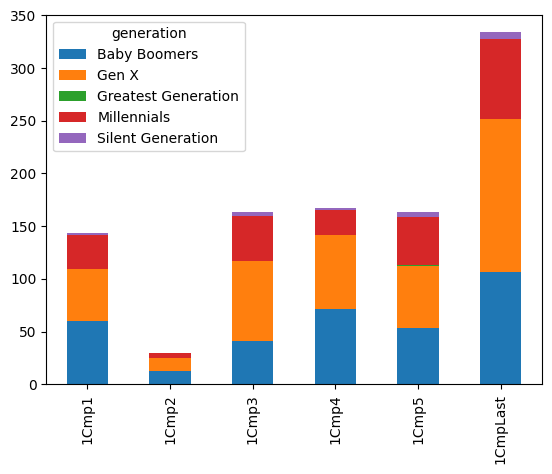

In [508]:
crossTabGenFullPartiCount.set_index('generation').transpose().plot.bar(stacked=True)
plt.xticks(rotation = 90)
plt.show()

**Gen X is the biggest to have participated in campaigns**

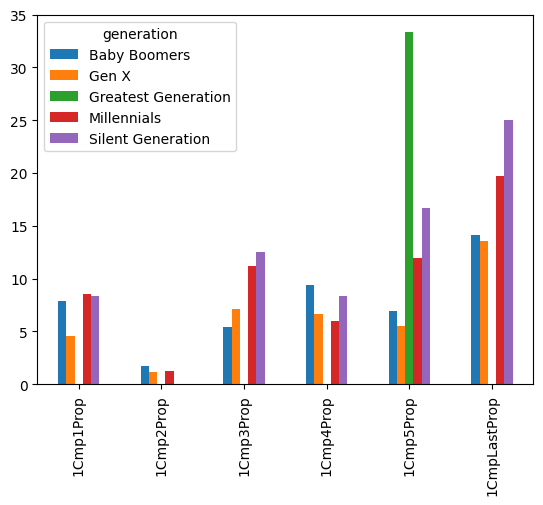

In [781]:
crossTabGenFullPartiProp.set_index('generation').transpose().plot.bar(stacked=False)
plt.xticks(rotation = 90)
plt.show()

**There's no clear interest to specific generation as participant, but tends towards Millenials**

**Based on top population, we can conclude that Gen X has biggest pool and shape the participant per campaign**
But, the interest seems not clear which generation took more interest in the campaigns, but tends a bit towards Millennials

#### **DETAILS**

##### **All Campaign?**

In [510]:
display(((dfStore[dfStore['freqParticipationCmp'] != 0]['generation'].value_counts() / catGen) * 100).sort_values(ascending=False),
        dfStore[dfStore['freqParticipationCmp'] != 0]['generation'].value_counts())

Silent Generation      45.833333
Greatest Generation    33.333333
Millennials            30.909091
Baby Boomers           29.117260
Gen X                  24.041160
Name: generation, dtype: float64

Gen X                  257
Baby Boomers           221
Millennials            119
Silent Generation       11
Greatest Generation      1
Name: generation, dtype: int64

**24% Gen X / 257 people of 1069 people have participated**  
29% Baby Boomers / 221 people of 759 people have participated  
30% Millenials / 119 people of 385 people have participated

##### **Last Campaign?**

In [511]:
display(((dfStore[dfStore['isAcceptedCmpLast'] == 1]['generation'].value_counts() / catGen) * 100).sort_values(ascending=False),
        dfStore[dfStore['isAcceptedCmpLast'] == 1]['generation'].value_counts())

Silent Generation      25.000000
Millennials            19.740260
Baby Boomers           14.097497
Gen X                  13.564079
Greatest Generation          NaN
Name: generation, dtype: float64

Gen X                145
Baby Boomers         107
Millennials           76
Silent Generation      6
Name: generation, dtype: int64

**13% Gen X / 145 people of 1069 people participated in Last Campaign**  
14% Baby Boomers / 107 people of 759 people participated in Last Campaign  
19% Millennials / 76 people of 385 people participated in Last Campaign

##### **First 5 Campaign?**

In [512]:
display(((dfStore[dfStore[cmp1To5Col].sum(axis=1) != 0]['generation'].value_counts() / catGen) * 100).sort_values(ascending=False),
        dfStore[dfStore[cmp1To5Col].sum(axis=1) != 0]['generation'].value_counts())

Silent Generation      41.666667
Greatest Generation    33.333333
Millennials            24.415584
Baby Boomers           22.397892
Gen X                  17.586529
Name: generation, dtype: float64

Gen X                  188
Baby Boomers           170
Millennials             94
Silent Generation       10
Greatest Generation      1
Name: generation, dtype: int64

**17% Gen X / 188 people of 1069 people participated in First 5 Campaign**  
22% Baby Boomers / 170 people of 759 people participated in First 5 Campaign  
24% Millenials / 94 people of 385 people participated in First 5 Campaign

##### **2nd Campaign?**

In [513]:
display(((dfStore[dfStore['isAcceptedCmp2'] != 0]['generation'].value_counts() / catGen) * 100).sort_values(ascending=False),
        dfStore[dfStore['isAcceptedCmp2'] != 0]['generation'].value_counts())

Baby Boomers           1.712780
Millennials            1.298701
Gen X                  1.122544
Greatest Generation         NaN
Silent Generation           NaN
Name: generation, dtype: float64

Baby Boomers    13
Gen X           12
Millennials      5
Name: generation, dtype: int64

**1.7% Baby Boomers / 13 people of 759 people particiapted in 2nd Campaign**  
1.1% Gen X / 12 people of 1069 people particiapted in 2nd Campaign  
1.3% Millenials / 5 people of 385 people particiapted in 2nd Campaign

#### **OVERALL CONCLUSION OF AGE**
1. Based on proportion, Gen X, Baby Boomers, Millenials has the highest proportion of general Age Demographics. Those 3 are the most potential to be digged on.  
2. Most of the campaign participants, based on the proportion, always have Millenials as the highest proportion followed by Baby Boomers and then Gen X.
3. Gen X is the largest pool of population but don't participate as much as other categories. It means, the potentiality is wasted. Meanwhile the quantity, most of the time, has Gen X as top participant quantity.
4. Most of the campaigns seems to target Millenials, but the Millenials themselves are not the highest population pool.
5. The 2nd Campaign seems to target more Baby Boomers, based on participant quantity, but seems not working too.
    - We still can't conclude what makes Last Campaign doubles the participant, while the 2nd campaign failed.

### **EDUCATION**

**We will try to find which education participate most in the campaign to see the problems that happened and what are the best education to be targeted in the next campaign**

([<matplotlib.patches.Wedge at 0x144f24d10>,
 [Text(-0.010799092464652335, 1.099946989450828, 'Graduation'),
  Text(-0.840441051704004, -0.7096892549635142, 'PhD'),
  Text(0.3574766803682644, -1.0402934311976049, 'Master'),
  Text(0.9970110351959686, -0.46472464502914335, '2n Cycle'),
  Text(1.09684684539309, -0.083228587343696, 'Basic')],
 [Text(-0.005890414071628546, 0.5999710851549971, '50.3%'),
  Text(-0.45842239183854755, -0.38710322998009866, '21.7%'),
  Text(0.1949872802008715, -0.567432780653239, '16.5%'),
  Text(0.5438242010159828, -0.25348617001589635, '9.1%'),
  Text(0.59828009748714, -0.04539741127837963, '2.4%')])

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64

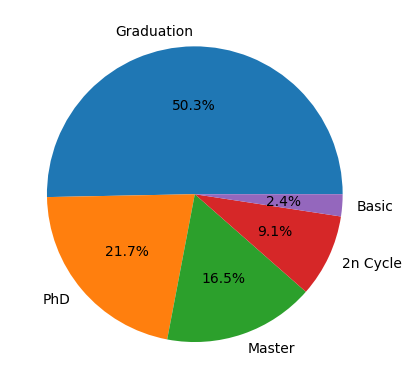

In [514]:
catEdu = dfStore['education'].value_counts()
display(plt.pie(catEdu,
                labels=catEdu.index,
                autopct='%1.1f%%'),
        catEdu)

**3 Top Education Level**  
1. Graduation >> 50% / 1127 People
2. PhD >> 22% / 486 People
3. Master >> 16% / 370 People

These are the most potential education to be targeted in the next campaign

#### **COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION**

**We should look into composition of participants per campaign**  
This way, we can tell which is the most potential education to target and which education gives interest to past campaigns

In [515]:
# allEduProp = dfStore.groupby('education')[cmpAllCol].agg(['value_counts'])
# allEduProp = allEduProp.loc[allEduProp.index.get_level_values('isAcceptedCmp1') == 1].transpose()
# allEduProp

In [516]:
# allEduProp.plot(kind='bar', stacked=True)
# plt.xticks(rotation = 90)
# plt.show()

In [619]:
# CARA 2 tapi panjang tapi indexing rapih
crossTabEduCmp1 = pd.crosstab(index = dfStore['education'],
                          columns= dfStore['isAcceptedCmp1']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabEduCmp2 = pd.crosstab(index = dfStore['education'],
                          columns= dfStore['isAcceptedCmp2']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabEduCmp3 = pd.crosstab(index = dfStore['education'],
                          columns= dfStore['isAcceptedCmp3']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabEduCmp4 = pd.crosstab(index = dfStore['education'],
                          columns= dfStore['isAcceptedCmp4']).reset_index().rename({0 : '0Cmp4', 1 : '1Cmp4'}, axis = 1)
crossTabEduCmp5 = pd.crosstab(index = dfStore['education'],
                          columns= dfStore['isAcceptedCmp5']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabEduCmpLast = pd.crosstab(index = dfStore['education'],
                          columns= dfStore['isAcceptedCmpLast']).reset_index().rename({0 : '0CmpLast', 1 : '1CmpLast'}, axis = 1)
crossTabEduCmpAll = pd.crosstab(index = dfStore['education'],
                          columns= dfStore['freqParticipationCmp'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabEduFull = crossTabEduCmp1.merge(crossTabEduCmp2, on='education') \
                                .merge(crossTabEduCmp3, on='education') \
                                .merge(crossTabEduCmp4, on='education') \
                                .merge(crossTabEduCmp5, on='education') \
                                .merge(crossTabEduCmpLast, on='education') \
                                .merge(crossTabEduCmpAll, on='education')
crossTabEduFull = crossTabEduFull.merge(catEdu.reset_index(name = 'count').rename({'index' : 'education'}, axis = 1),'inner','education')
crossTabEduFull['1Cmp1Prop'] = (crossTabEduFull['1Cmp1'] / crossTabEduFull['count']) * 100
crossTabEduFull['1Cmp2Prop'] = (crossTabEduFull['1Cmp2'] / crossTabEduFull['count']) * 100
crossTabEduFull['1Cmp3Prop'] = (crossTabEduFull['1Cmp3'] / crossTabEduFull['count']) * 100
crossTabEduFull['1Cmp4Prop'] = (crossTabEduFull['1Cmp4'] / crossTabEduFull['count']) * 100
crossTabEduFull['1Cmp5Prop'] = (crossTabEduFull['1Cmp5'] / crossTabEduFull['count']) * 100
crossTabEduFull['1CmpLastProp'] = (crossTabEduFull['1CmpLast'] / crossTabEduFull['count']) * 100
crossTabEduFull['1CmpAllProp'] = (crossTabEduFull['1CmpAll'] / crossTabEduFull['count']) * 100
crossTabEduFull

,education,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp4,1Cmp4,0Cmp5,1Cmp5,0CmpLast,1CmpLast,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp4Prop,1Cmp5Prop,1CmpLastProp,1CmpAllProp
0,2n Cycle,189,14,201,2,188,15,193,10,193,10,181,22,157,46,203,6.896552,0.985222,7.389163,4.926108,4.926108,10.837438,22.660099
1,Basic,54,0,54,0,48,6,54,0,54,0,52,2,47,7,54,0.000000,0.000000,11.111111,0.000000,0.000000,3.703704,12.962963
2,Graduation,1045,82,1111,16,1049,78,1046,81,1041,86,975,152,829,298,1127,7.275954,1.419698,6.921029,7.187223,7.630878,13.487134,26.441881
3,Master,352,18,368,2,346,24,339,31,342,28,313,57,270,100,370,4.864865,0.540541,6.486486,8.378378,7.567568,15.405405,27.027027
4,PhD,456,30,476,10,446,40,441,45,447,39,385,101,328,158,486,6.172840,2.057613,8.230453,9.259259,8.024691,20.781893,32.510288


**Here, basically we just make a crosstabulation to count frequency of each participation per campaign**  
The tables are separated by 2 type of count.  
The first one (left side) is count of 0 (not participated) and 1 (participated) per education.  
In the middle (count) is total population per education. So, we can calculate the proportion of participation per education.  
The second one (right side) is proportion of participation per education, calculated by participation count / population count per education.

This way we can conclude which education shape the whole campaign and which education has more interest to the campaign.

In [518]:
crossTabEduFullPartiCount = crossTabEduFull[['education','1Cmp1','1Cmp2','1Cmp3','1Cmp4','1Cmp5','1CmpLast']]
crossTabEduFullPartiProp = crossTabEduFull[['education','1Cmp1Prop','1Cmp2Prop','1Cmp3Prop','1Cmp4Prop','1Cmp5Prop','1CmpLastProp']]
display(crossTabEduFullPartiCount,
        crossTabEduFullPartiProp)

,education,1Cmp1,1Cmp2,1Cmp3,1Cmp4,1Cmp5,1CmpLast
0,2n Cycle,14,2,15,10,10,22
1,Basic,0,0,6,0,0,2
2,Graduation,82,16,78,81,86,152
3,Master,18,2,24,31,28,57
4,PhD,30,10,40,45,39,101


,education,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp4Prop,1Cmp5Prop,1CmpLastProp
0,2n Cycle,6.896552,0.985222,7.389163,4.926108,4.926108,10.837438
1,Basic,0.000000,0.000000,11.111111,0.000000,0.000000,3.703704
2,Graduation,7.275954,1.419698,6.921029,7.187223,7.630878,13.487134
3,Master,4.864865,0.540541,6.486486,8.378378,7.567568,15.405405
4,PhD,6.172840,2.057613,8.230453,9.259259,8.024691,20.781893


**Separate the table into two tables to make a visualization for composition of participant per campaign**

First table is count table, how much participant per campaign per education.  
This will tell which education shape the majority of campaign participant.

Second table is proportion table, how much proportion per education that participated in campaigns.  
This will tell which education take interest more in the campaigns because majority of population of that education has participated.

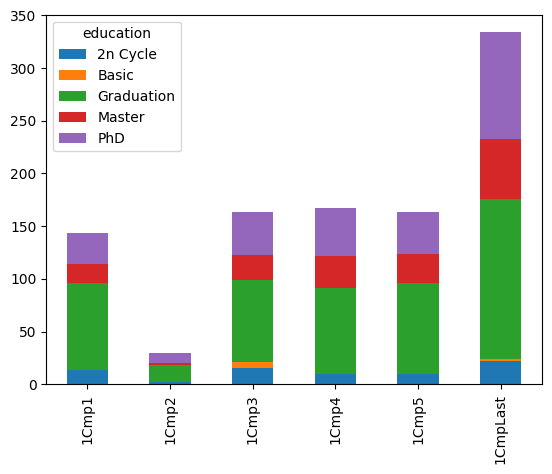

In [519]:
crossTabEduFullPartiCount.set_index('education').transpose().plot.bar(stacked=True)
plt.xticks(rotation = 90)
plt.show()

**Graduation is the biggest to have participated in Campaigns**

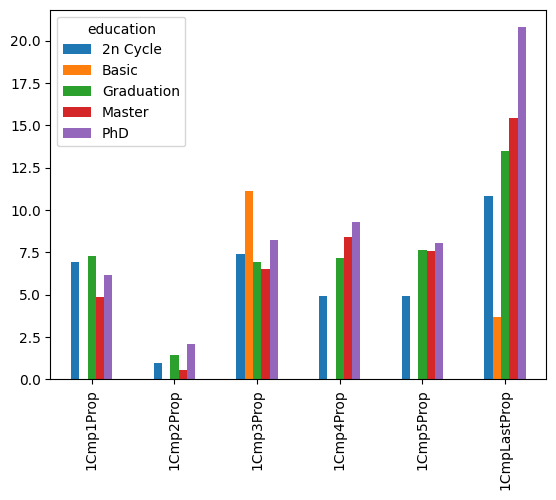

In [782]:
crossTabEduFullPartiProp.set_index('education').transpose().plot.bar(stacked=False)
plt.xticks(rotation = 90)
plt.show()

**There's no clear interest to specific education as participant, but tends towards PhD**

**Based on top population, we can conclude that Graduation has biggest pool and shape the participant per campaign**
But, the interest seems not clear which education took more interest in the campaigns, but tends a bit towards PhD

#### **DETAILS**

##### **All Campaign?**

In [521]:
display(((dfStore[dfStore['freqParticipationCmp'] != 0]['education'].value_counts() / catEdu) * 100).sort_values(ascending=False),
        dfStore[dfStore['freqParticipationCmp'] != 0]['education'].value_counts())

PhD           32.510288
Master        27.027027
Graduation    26.441881
2n Cycle      22.660099
Basic         12.962963
Name: education, dtype: float64

Graduation    298
PhD           158
Master        100
2n Cycle       46
Basic           7
Name: education, dtype: int64

**26% Graduation / 298 people of 1127 people have participated in the campaign**  
32% PhD / 158 people of 486 people have participated in the campaign  
27% Master / 100 people of 370 people have participated in the campaign

##### **Last Campaign?**

In [522]:
display(((dfStore[dfStore['isAcceptedCmpLast'] == 1]['education'].value_counts() / catEdu) * 100).sort_values(ascending=False),
        dfStore[dfStore['isAcceptedCmpLast'] == 1]['education'].value_counts())

PhD           20.781893
Master        15.405405
Graduation    13.487134
2n Cycle      10.837438
Basic          3.703704
Name: education, dtype: float64

Graduation    152
PhD           101
Master         57
2n Cycle       22
Basic           2
Name: education, dtype: int64

**13% Graduation / 152 people of 1127 people particiapted in Last Campaign**  
21% PhD / 101 people of 486 people particiapted in Last Campaign  
15% Master / 57 people of 370 people particiapted in Last Campaign

##### **First 5 Campaign?**

In [523]:
display(((dfStore[dfStore[cmp1To5Col].sum(axis=1) != 0]['education'].value_counts() / catEdu) * 100).sort_values(ascending=False),
        dfStore[dfStore[cmp1To5Col].sum(axis=1) != 0]['education'].value_counts())

PhD           23.456790
Graduation    20.408163
Master        20.270270
2n Cycle      18.719212
Basic         11.111111
Name: education, dtype: float64

Graduation    230
PhD           114
Master         75
2n Cycle       38
Basic           6
Name: education, dtype: int64

**20% Graduation / 230 people of 1127 people particiapted in First 5 Campaign**  
23% PhD / 114 people of 486 people particiapted in First 5 Campaign  
20% Master / 75 people of 370 people particiapted in First 5 Campaign

##### **2nd Campaign?**

In [524]:
display(((dfStore[dfStore['isAcceptedCmp2'] != 0]['education'].value_counts() / catEdu) * 100).sort_values(ascending=False),
        dfStore[dfStore['isAcceptedCmp2'] != 0]['education'].value_counts())

PhD           2.057613
Graduation    1.419698
2n Cycle      0.985222
Master        0.540541
Basic              NaN
Name: education, dtype: float64

Graduation    16
PhD           10
Master         2
2n Cycle       2
Name: education, dtype: int64

**1.4%% Graduation / 16 people of 1127 people particiapted in 2nd Campaign**  
2% PhD / 10 people of 486 people particiapted in 2nd Campaign  
0.5% Master / 2 people of 370 people particiapted in 2nd Campaign

#### **OVERALL CONCLUSION OF EDU**
1. Based on proportion, Graduation, PhD, Master has the highest proportion of general Education Demographics. Those 3 are the most potential to be digged on.  
2. Most of the campaign participants, based on the proportion, always have PhD as the highest proportion followed by Master and then Graduation.
3. Graduation is the largest pool of population but don't participate as much as other categories. It means, the potentiality is wasted. Meanwhile the quantity, most of the time, has Graduation as top participant quantity.
4. Most of the campaigns seems to target PhD, but the PhD themselves are not the highest population pool.
5. We still can't conclude what makes Last Campaign doubles the participant, while the 2nd campaign failed. All the patterns are quite the same

### **STATUS MARITAL**

**We will try to find which marital participate most in the campaign to see the problems that happened and what are the best marital to be targeted in the next campaign**

([<matplotlib.patches.Wedge at 0x144fcd290>,
 [Text(0.38651228445009445, 1.0298583659752294, 'Married'),
  Text(-1.095001320486733, -0.10474783115802916, 'Together'),
  Text(0.012341737200255306, -1.0999307621495455, 'Single'),
  Text(0.9313966387202842, -0.585235253022711, 'Divorced'),
  Text(1.091053373137542, -0.1400090602967946, 'Widow'),
  Text(1.099869099659501, -0.016969490687659825, 'Alone'),
  Text(1.0999610540804825, -0.009256322496208415, 'Absurd'),
  Text(1.0999956727401774, -0.0030854420890123325, 'YOLO')],
 [Text(0.21082488242732422, 0.5617409268955795, '38.6%'),
  Text(-0.597273447538218, -0.05713518063165226, '25.9%'),
  Text(0.006731856654684711, -0.599962233899752, '21.4%'),
  Text(0.508034530211064, -0.31921922892147864, '10.4%'),
  Text(0.5951200217113866, -0.07636857834370614, '3.4%'),
  Text(0.5999285998142733, -0.00925608582963263, '0.1%'),
  Text(0.5999787567711722, -0.005048903179750044, '0.1%'),
  Text(0.5999976396764604, -0.0016829684121885448, '0.1%')])

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: statusMarital, dtype: int64

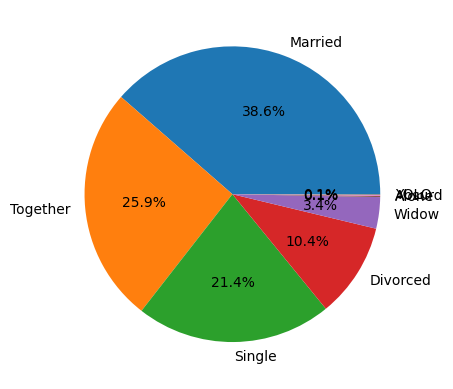

In [527]:
catMarital = dfStore['statusMarital'].value_counts()
display(plt.pie(catMarital,
                labels=catMarital.index,
                autopct='%1.1f%%'),
        catMarital)

**3 Top Marital Status**  
1. Married >> 39% / 864 People
2. Together >> 26% / 580 People
3. Single >> 21% / 480 People

These are the most potential marital to be targeted in the next campaign

#### **COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION**

**We should look into composition of participants per campaign**  
This way, we can tell which is the most potential marital to target and which marital gives interest to past campaigns

In [528]:
# allMaritalProp = dfStore.groupby('statusMarital')[cmpAllCol].agg(['value_counts'])
# allMaritalProp = allMaritalProp.loc[allMaritalProp.index.get_level_values('isAcceptedCmp1') == 1].transpose()
# allMaritalProp

In [529]:
# allMaritalProp.plot(kind='bar', stacked=True)
# plt.xticks(rotation = 90)
# plt.show()

In [620]:
# CARA 2 tapi panjang tapi indexing rapih
crossTabMaritalCmp1 = pd.crosstab(index = dfStore['statusMarital'],
                          columns= dfStore['isAcceptedCmp1']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabMaritalCmp2 = pd.crosstab(index = dfStore['statusMarital'],
                          columns= dfStore['isAcceptedCmp2']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabMaritalCmp3 = pd.crosstab(index = dfStore['statusMarital'],
                          columns= dfStore['isAcceptedCmp3']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabMaritalCmp4 = pd.crosstab(index = dfStore['statusMarital'],
                          columns= dfStore['isAcceptedCmp4']).reset_index().rename({0 : '0Cmp4', 1 : '1Cmp4'}, axis = 1)
crossTabMaritalCmp5 = pd.crosstab(index = dfStore['statusMarital'],
                          columns= dfStore['isAcceptedCmp5']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabMaritalCmpLast = pd.crosstab(index = dfStore['statusMarital'],
                          columns= dfStore['isAcceptedCmpLast']).reset_index().rename({0 : '0CmpLast', 1 : '1CmpLast'}, axis = 1)
crossTabMaritalCmpAll = pd.crosstab(index = dfStore['statusMarital'],
                          columns= dfStore['freqParticipationCmp'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabMaritalFull = crossTabMaritalCmp1.merge(crossTabMaritalCmp2, on='statusMarital') \
                                .merge(crossTabMaritalCmp3, on='statusMarital') \
                                .merge(crossTabMaritalCmp4, on='statusMarital') \
                                .merge(crossTabMaritalCmp5, on='statusMarital') \
                                .merge(crossTabMaritalCmpLast, on='statusMarital') \
                                .merge(crossTabMaritalCmpAll, on='statusMarital')
crossTabMaritalFull = crossTabMaritalFull.merge(catMarital.reset_index(name = 'count').rename({'index' : 'statusMarital'}, axis = 1),'inner','statusMarital')
crossTabMaritalFull['1Cmp1Prop'] = (crossTabMaritalFull['1Cmp1'] / crossTabMaritalFull['count']) * 100
crossTabMaritalFull['1Cmp2Prop'] = (crossTabMaritalFull['1Cmp2'] / crossTabMaritalFull['count']) * 100
crossTabMaritalFull['1Cmp3Prop'] = (crossTabMaritalFull['1Cmp3'] / crossTabMaritalFull['count']) * 100
crossTabMaritalFull['1Cmp4Prop'] = (crossTabMaritalFull['1Cmp4'] / crossTabMaritalFull['count']) * 100
crossTabMaritalFull['1Cmp5Prop'] = (crossTabMaritalFull['1Cmp5'] / crossTabMaritalFull['count']) * 100
crossTabMaritalFull['1CmpLastProp'] = (crossTabMaritalFull['1CmpLast'] / crossTabMaritalFull['count']) * 100
crossTabMaritalFull['1CmpAllProp'] = (crossTabMaritalFull['1CmpAll'] / crossTabMaritalFull['count']) * 100
crossTabMaritalFull

,statusMarital,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp4,1Cmp4,0Cmp5,1Cmp5,0CmpLast,1CmpLast,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp4Prop,1Cmp5Prop,1CmpLastProp,1CmpAllProp
0,Absurd,1,1,2,0,2,0,2,0,1,1,1,1,1,1,2,50.000000,0.000000,0.000000,0.000000,50.000000,50.000000,50.000000
1,Alone,3,0,3,0,2,1,3,0,3,0,2,1,2,1,3,0.000000,0.000000,33.333333,0.000000,0.000000,33.333333,33.333333
2,Divorced,220,12,227,5,212,20,214,18,219,13,184,48,163,69,232,5.172414,2.155172,8.620690,7.758621,5.603448,20.689655,29.741379
3,Married,801,63,857,7,801,63,801,63,798,66,766,98,647,217,864,7.291667,0.810185,7.291667,7.291667,7.638889,11.342593,25.115741
4,Single,449,31,475,5,442,38,447,33,449,31,374,106,332,148,480,6.458333,1.041667,7.916667,6.875000,6.458333,22.083333,30.833333
5,Together,548,32,568,12,543,37,537,43,536,44,520,60,435,145,580,5.517241,2.068966,6.379310,7.413793,7.586207,10.344828,25.000000
6,Widow,72,5,76,1,73,4,67,10,69,8,58,19,50,27,77,6.493506,1.298701,5.194805,12.987013,10.389610,24.675325,35.064935
7,YOLO,2,0,2,0,2,0,2,0,2,0,1,1,1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000


**Here, basically we just make a crosstabulation to count frequency of each participation per campaign**  
The tables are separated by 2 type of count.  
The first one (left side) is count of 0 (not participated) and 1 (participated) per marital.  
In the middle (count) is total population per marital. So, we can calculate the proportion of participation per marital.  
The second one (right side) is proportion of participation per marital, calculated by participation count / population count per marital.

This way we can conclude which marital shape the whole campaign and which marital has more interest to the campaign.

In [531]:
crossTabMaritalFullPartiCount = crossTabMaritalFull[['statusMarital','1Cmp1','1Cmp2','1Cmp3','1Cmp4','1Cmp5','1CmpLast']]
crossTabMaritalFullPartiProp = crossTabMaritalFull[['statusMarital','1Cmp1Prop','1Cmp2Prop','1Cmp3Prop','1Cmp4Prop','1Cmp5Prop','1CmpLastProp']]
display(crossTabMaritalFullPartiCount,
        crossTabMaritalFullPartiProp)

,statusMarital,1Cmp1,1Cmp2,1Cmp3,1Cmp4,1Cmp5,1CmpLast
0,Absurd,1,0,0,0,1,1
1,Alone,0,0,1,0,0,1
2,Divorced,12,5,20,18,13,48
3,Married,63,7,63,63,66,98
4,Single,31,5,38,33,31,106
5,Together,32,12,37,43,44,60
6,Widow,5,1,4,10,8,19
7,YOLO,0,0,0,0,0,1


,statusMarital,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp4Prop,1Cmp5Prop,1CmpLastProp
0,Absurd,50.000000,0.000000,0.000000,0.000000,50.000000,50.000000
1,Alone,0.000000,0.000000,33.333333,0.000000,0.000000,33.333333
2,Divorced,5.172414,2.155172,8.620690,7.758621,5.603448,20.689655
3,Married,7.291667,0.810185,7.291667,7.291667,7.638889,11.342593
4,Single,6.458333,1.041667,7.916667,6.875000,6.458333,22.083333
5,Together,5.517241,2.068966,6.379310,7.413793,7.586207,10.344828
6,Widow,6.493506,1.298701,5.194805,12.987013,10.389610,24.675325
7,YOLO,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000


**Separate the table into two tables to make a visualization for composition of participant per campaign**

First table is count table, how much participant per campaign per marital.  
This will tell which marital shape the majority of campaign participant.

Second table is proportion table, how much proportion per marital that participated in campaigns.  
This will tell which marital take interest more in the campaigns because majority of population of that marital has participated.

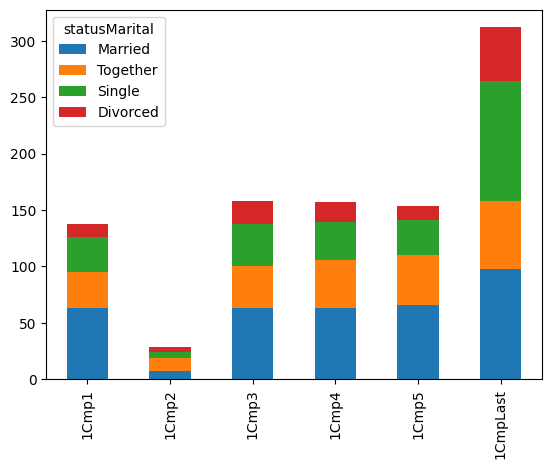

In [532]:
crossTabMaritalFullPartiCount.iloc[[3,5,4,2]].set_index('statusMarital').transpose().plot.bar(stacked=True)
plt.xticks(rotation = 90)
plt.show()

**Most of the participant is Married**  
Last Campaign is participated more by Single

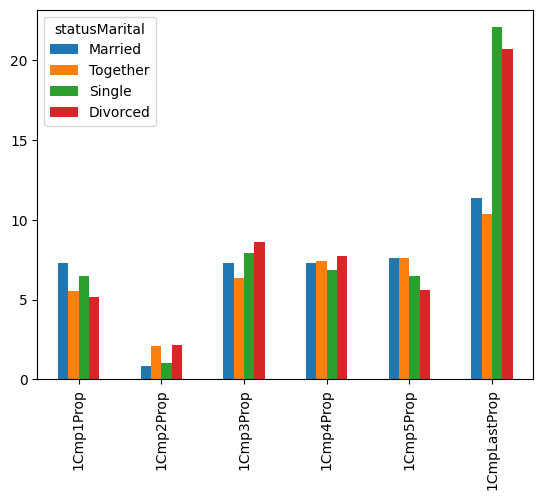

In [783]:
crossTabMaritalFullPartiProp.iloc[[3,5,4,2]].set_index('statusMarital').transpose().plot.bar(stacked=False)
plt.xticks(rotation = 90)
plt.show()

**There's no clear interest to specific status marital as participant**  
But, seems to attract Single

**Based on top population, we can conclude that Married has biggest pool and shape the participant per campaign**
But, the interest seems not clear which marital took more interest in the campaigns, but tends a bit towards Single

#### **DETAILS**

##### **All Campaign?**

In [534]:
display(((dfStore[dfStore['freqParticipationCmp'] != 0]['statusMarital'].value_counts() / catMarital) * 100).sort_values(ascending=False),
        dfStore[dfStore['freqParticipationCmp'] != 0]['statusMarital'].value_counts())

Absurd      50.000000
YOLO        50.000000
Widow       35.064935
Alone       33.333333
Single      30.833333
Divorced    29.741379
Married     25.115741
Together    25.000000
Name: statusMarital, dtype: float64

Married     217
Single      148
Together    145
Divorced     69
Widow        27
Alone         1
Absurd        1
YOLO          1
Name: statusMarital, dtype: int64

**25% Married / 217 people of 864 people have particiapted in Campaign**  
30% Single / 148 people of 480 people have particiapted in Campaign  
25% Together / 145 people of 580 people have particiapted in Campaign

##### **Last Campaign?**

In [535]:
display(((dfStore[dfStore['isAcceptedCmpLast'] == 1]['statusMarital'].value_counts() / catMarital) * 100).sort_values(ascending=False),
        dfStore[dfStore['isAcceptedCmpLast'] == 1]['statusMarital'].value_counts())

Absurd      50.000000
YOLO        50.000000
Alone       33.333333
Widow       24.675325
Single      22.083333
Divorced    20.689655
Married     11.342593
Together    10.344828
Name: statusMarital, dtype: float64

Single      106
Married      98
Together     60
Divorced     48
Widow        19
Alone         1
Absurd        1
YOLO          1
Name: statusMarital, dtype: int64

**22% Single / 106 people of 480 people have particiapted in Last Campaign**  
11% Maried / 98 people of 864 people have particiapted in Last Campaign  
10% Together / 60 people of 580 people have particiapted in Last Campaign

##### **First 5 Campaign?**

In [536]:
display(((dfStore[dfStore[cmp1To5Col].sum(axis=1) != 0]['statusMarital'].value_counts() / catMarital) * 100).sort_values(ascending=False),
        dfStore[dfStore[cmp1To5Col].sum(axis=1) != 0]['statusMarital'].value_counts())

Absurd      50.000000
Alone       33.333333
Widow       24.675325
Married     21.064815
Single      20.416667
Together    20.000000
Divorced    19.827586
YOLO              NaN
Name: statusMarital, dtype: float64

Married     182
Together    116
Single       98
Divorced     46
Widow        19
Alone         1
Absurd        1
Name: statusMarital, dtype: int64

**21% Married / 182 people of 864 people have particiapted in First 5 Campaign**  
20% Together / 116 people of 580 people have particiapted in First 5 Campaign  
20% Single / 98 people of 480 people have particiapted in First 5 Campaign

##### **2nd Campaign?**

In [537]:
display(((dfStore[dfStore['isAcceptedCmp2'] != 0]['statusMarital'].value_counts() / catMarital) * 100).sort_values(ascending=False),
        dfStore[dfStore['isAcceptedCmp2'] != 0]['statusMarital'].value_counts())

Divorced    2.155172
Together    2.068966
Widow       1.298701
Single      1.041667
Married     0.810185
Absurd           NaN
Alone            NaN
YOLO             NaN
Name: statusMarital, dtype: float64

Together    12
Married      7
Divorced     5
Single       5
Widow        1
Name: statusMarital, dtype: int64

**2% Together / 12 people of 580 people have particiapted in First 5 Campaign**  
0.8% Married / 7 people of 864 people have particiapted in First 5 Campaign   
1% Single / 5 people of 480 people have particiapted in First 5 Campaign

#### **OVERALL CONCLUSION OF MARITAL**
1. Based on proportion, Married, Together, Single has the highest proportion of general Marital Demographics. Those 3 are the most potential to be digged on.  
2. There's no clear audience targetting at marital status
3. Married and Together can be assumed as participant who has couple. Together, they consist more than 50% of the population, being the solely highest and most potential.
5. We still can't conclude what makes Last Campaign doubles the participant, while the 2nd campaign failed. All the patterns are quite the same

### **ECONOMIC CLASS**

**We will try to find which economic class participate most in the campaign to see the problems that happened and what are the best economic class to be targeted in the next campaign**

([<matplotlib.patches.Wedge at 0x143177e10>,
 [Text(-0.7756325792908255, 0.7799962191848506, 'Lower Middle Class'),
  Text(0.6858386670154847, -0.8600147224474841, 'Working Class'),
  Text(1.0910533477396227, -0.1400092582158839, 'Lower Class'),
  Text(1.0997879614276573, -0.021597219700641396, 'Upper Middle Class'),
  Text(1.0999989179308811, -0.001542903396509121, 'Upper Class')],
 [Text(-0.4230723159768139, 0.4254524831917367, '74.9%'),
  Text(0.37409381837208255, -0.4690989395168095, '21.6%'),
  Text(0.595120007857976, -0.07636868629957302, '2.9%'),
  Text(0.5998843425969039, -0.011780301654895306, '0.5%'),
  Text(0.5999994097804805, -0.0008415836708231568, '0.0%')])

Lower Middle Class    1678
Working Class          484
Lower Class             65
Upper Middle Class      12
Upper Class              1
Name: ecoClass, dtype: int64

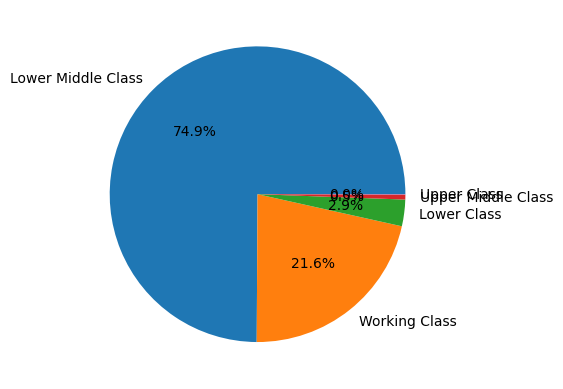

In [542]:
catEco = dfStore['ecoClass'].value_counts()
display(plt.pie(catEco,
                labels=catEco.index,
                autopct='%1.1f%%'),
        catEco)

**2 Top Income Status**  
1. Lower Middle Class >> 75% / 1678 People
2. Working Class >> 22% / 484 People

These are the most potential economic class to be targeted in the next campaign

#### **COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION**

**We should look into composition of participants per campaign**  
This way, we can tell which is the most potential economic class to target and which economic class gives interest to past campaigns

In [543]:
# allEcoProp = dfStore.groupby('ecoClass')[cmpAllCol].agg(['value_counts'])
# allEcoProp = allEcoProp.loc[allEcoProp.index.get_level_values('isAcceptedCmp1') == 1].transpose()
# allEcoProp

In [544]:
# allEcoProp.plot(kind='bar', stacked=True)
# plt.xticks(rotation = 90)
# plt.show()

In [621]:
# CARA 2 tapi panjang tapi indexing rapih
crossTabEcoCmp1 = pd.crosstab(index = dfStore['ecoClass'],
                          columns= dfStore['isAcceptedCmp1']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabEcoCmp2 = pd.crosstab(index = dfStore['ecoClass'],
                          columns= dfStore['isAcceptedCmp2']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabEcoCmp3 = pd.crosstab(index = dfStore['ecoClass'],
                          columns= dfStore['isAcceptedCmp3']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabEcoCmp4 = pd.crosstab(index = dfStore['ecoClass'],
                          columns= dfStore['isAcceptedCmp4']).reset_index().rename({0 : '0Cmp4', 1 : '1Cmp4'}, axis = 1)
crossTabEcoCmp5 = pd.crosstab(index = dfStore['ecoClass'],
                          columns= dfStore['isAcceptedCmp5']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabEcoCmpLast = pd.crosstab(index = dfStore['ecoClass'],
                          columns= dfStore['isAcceptedCmpLast']).reset_index().rename({0 : '0CmpLast', 1 : '1CmpLast'}, axis = 1)
crossTabEcoCmpAll = pd.crosstab(index = dfStore['ecoClass'],
                          columns= dfStore['freqParticipationCmp'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabEcoFull = crossTabEcoCmp1.merge(crossTabEcoCmp2, on='ecoClass') \
                                .merge(crossTabEcoCmp3, on='ecoClass') \
                                .merge(crossTabEcoCmp4, on='ecoClass') \
                                .merge(crossTabEcoCmp5, on='ecoClass') \
                                .merge(crossTabEcoCmpLast, on='ecoClass') \
                                .merge(crossTabEcoCmpAll, on='ecoClass')
crossTabEcoFull = crossTabEcoFull.merge(catEco.reset_index(name = 'count').rename({'index' : 'ecoClass'}, axis = 1),'inner','ecoClass')
crossTabEcoFull['1Cmp1Prop'] = (crossTabEcoFull['1Cmp1'] / crossTabEcoFull['count']) * 100
crossTabEcoFull['1Cmp2Prop'] = (crossTabEcoFull['1Cmp2'] / crossTabEcoFull['count']) * 100
crossTabEcoFull['1Cmp3Prop'] = (crossTabEcoFull['1Cmp3'] / crossTabEcoFull['count']) * 100
crossTabEcoFull['1Cmp4Prop'] = (crossTabEcoFull['1Cmp4'] / crossTabEcoFull['count']) * 100
crossTabEcoFull['1Cmp5Prop'] = (crossTabEcoFull['1Cmp5'] / crossTabEcoFull['count']) * 100
crossTabEcoFull['1CmpLastProp'] = (crossTabEcoFull['1CmpLast'] / crossTabEcoFull['count']) * 100
crossTabEcoFull['1CmpAllProp'] = (crossTabEcoFull['1CmpAll'] / crossTabEcoFull['count']) * 100
crossTabEcoFull

,ecoClass,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp4,1Cmp4,0Cmp5,1Cmp5,0CmpLast,1CmpLast,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp4Prop,1Cmp5Prop,1CmpLastProp,1CmpAllProp
0,Lower Class,65,0,65,0,58,7,65,0,65,0,57,8,53,12,65,0.000000,0.000000,10.769231,0.000000,0.000000,12.307692,18.461538
1,Lower Middle Class,1538,140,1649,29,1556,122,1515,163,1519,159,1403,275,1151,527,1678,8.343266,1.728248,7.270560,9.713945,9.475566,16.388558,31.406436
2,Upper Class,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Upper Middle Class,8,4,11,1,12,0,9,3,8,4,8,4,8,4,12,33.333333,8.333333,0.000000,25.000000,33.333333,33.333333,33.333333
4,Working Class,484,0,484,0,450,34,483,1,484,0,437,47,418,66,484,0.000000,0.000000,7.024793,0.206612,0.000000,9.710744,13.636364


**Here, basically we just make a crosstabulation to count frequency of each participation per campaign**  
The tables are separated by 2 type of count.  
The first one (left side) is count of 0 (not participated) and 1 (participated) per economic class.  
In the middle (count) is total population per economic class. So, we can calculate the proportion of participation per economic class.  
The second one (right side) is proportion of participation per economic class, calculated by participation count / population count per economic class.

This way we can conclude which economic class shape the whole campaign and which economic class has more interest to the campaign.

In [546]:
crossTabEcoFullPartiCount = crossTabEcoFull[['ecoClass','1Cmp1','1Cmp2','1Cmp3','1Cmp4','1Cmp5','1CmpLast']]
crossTabEcoFullPartiProp = crossTabEcoFull[['ecoClass','1Cmp1Prop','1Cmp2Prop','1Cmp3Prop','1Cmp4Prop','1Cmp5Prop','1CmpLastProp']]
display(crossTabEcoFullPartiCount,
        crossTabEcoFullPartiProp)

,ecoClass,1Cmp1,1Cmp2,1Cmp3,1Cmp4,1Cmp5,1CmpLast
0,Lower Class,0,0,7,0,0,8
1,Lower Middle Class,140,29,122,163,159,275
2,Upper Class,0,0,0,0,0,0
3,Upper Middle Class,4,1,0,3,4,4
4,Working Class,0,0,34,1,0,47


,ecoClass,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp4Prop,1Cmp5Prop,1CmpLastProp
0,Lower Class,0.000000,0.000000,10.769231,0.000000,0.000000,12.307692
1,Lower Middle Class,8.343266,1.728248,7.270560,9.713945,9.475566,16.388558
2,Upper Class,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Upper Middle Class,33.333333,8.333333,0.000000,25.000000,33.333333,33.333333
4,Working Class,0.000000,0.000000,7.024793,0.206612,0.000000,9.710744


**Separate the table into two tables to make a visualization for composition of participant per campaign**

First table is count table, how much participant per campaign per economic class.  
This will tell which economic class shape the majority of campaign participant.

Second table is proportion table, how much proportion per economic class that participated in campaigns.  
This will tell which economic class take interest more in the campaigns because majority of population of that economic class has participated.

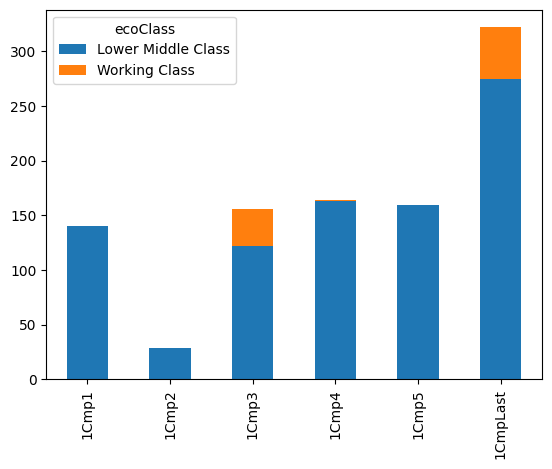

In [547]:
crossTabEcoFullPartiCount.iloc[[1,4]].set_index('ecoClass').transpose().plot.bar(stacked=True)
plt.xticks(rotation = 90)
plt.show()

**Most of the participant is Lower Middle Class**

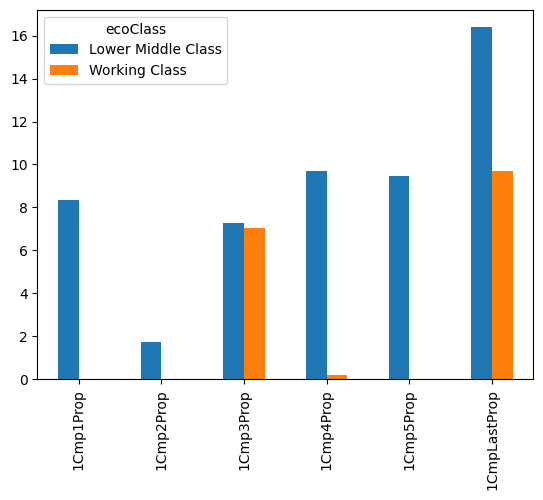

In [784]:
crossTabEcoFullPartiProp.iloc[[1,4]].set_index('ecoClass').transpose().plot.bar(stacked=False)
plt.xticks(rotation = 90)
plt.show()

**Most of the campaign interest is towards Lower Middle Class**  
Working Class seems to have interest in 3rd campaign and last campaign

**Based on top population, we can conclude that Lower Middle Class has biggest pool and shape the participant per campaign**

#### **DETAILS**

##### **All Campaign?**

In [549]:
display(((dfStore[dfStore['freqParticipationCmp'] != 0]['ecoClass'].value_counts() / catEco) * 100).sort_values(ascending=False),
        dfStore[dfStore['freqParticipationCmp'] != 0]['ecoClass'].value_counts())

Upper Middle Class    33.333333
Lower Middle Class    31.406436
Lower Class           18.461538
Working Class         13.636364
Upper Class                 NaN
Name: ecoClass, dtype: float64

Lower Middle Class    527
Working Class          66
Lower Class            12
Upper Middle Class      4
Name: ecoClass, dtype: int64

**31% Lower Middle Class / 527 people of 1678 people have particiapted in Campaign**  
13% Working Class / 66 people of 484 people have particiapted in Campaign  

##### **Last Campaign?**

In [550]:
display(((dfStore[dfStore['isAcceptedCmpLast'] == 1]['ecoClass'].value_counts() / catEco) * 100).sort_values(ascending=False),
        dfStore[dfStore['isAcceptedCmpLast'] == 1]['ecoClass'].value_counts())

Upper Middle Class    33.333333
Lower Middle Class    16.388558
Lower Class           12.307692
Working Class          9.710744
Upper Class                 NaN
Name: ecoClass, dtype: float64

Lower Middle Class    275
Working Class          47
Lower Class             8
Upper Middle Class      4
Name: ecoClass, dtype: int64

**16% Lower Middle Class / 275 people of 1678 people have particiapted in Last Campaign**  
9% Working Class / 47 people of 484 people have particiapted in Last Campaign  

##### **First 5 Campaign?**

In [551]:
display(((dfStore[dfStore[cmp1To5Col].sum(axis=1) != 0]['ecoClass'].value_counts() / catEco) * 100).sort_values(ascending=False),
        dfStore[dfStore[cmp1To5Col].sum(axis=1) != 0]['ecoClass'].value_counts())

Upper Middle Class    33.333333
Lower Middle Class    24.851013
Lower Class           10.769231
Working Class          7.231405
Upper Class                 NaN
Name: ecoClass, dtype: float64

Lower Middle Class    417
Working Class          35
Lower Class             7
Upper Middle Class      4
Name: ecoClass, dtype: int64

**24% Lower Middle Class / 417 people of 1678 people have particiapted in Last Campaign**  
7% Working Class / 35 people of 484 people have particiapted in Last Campaign  

##### **2nd Campaign?**

In [552]:
display(((dfStore[dfStore['isAcceptedCmp2'] != 0]['ecoClass'].value_counts() / catEco) * 100).sort_values(ascending=False),
        dfStore[dfStore['isAcceptedCmp2'] != 0]['ecoClass'].value_counts())

Upper Middle Class    8.333333
Lower Middle Class    1.728248
Lower Class                NaN
Upper Class                NaN
Working Class              NaN
Name: ecoClass, dtype: float64

Lower Middle Class    29
Upper Middle Class     1
Name: ecoClass, dtype: int64

**1.7% Lower Middle Class / 29 people of 1678 people have particiapted in Last Campaign**  
0% Working Class / 0 people of 484 people have particiapted in Last Campaign  

#### **OVERALL CONCLUSION OF ECONOMIC CLASS**
1. Based on proportion, Lower Middle Class, Working Class have the highest proportion of general Economic Class Demographics. Those 2 are the most potential to be digged on.  
2. There's a clear audience targetting at Economic Class, Lower Middle Class. But Working Class seems to participate more in 3rd and last campaign.
3. We still can't conclude what makes Last Campaign doubles the participant, while the 2nd campaign failed. All the patterns are quite the same

### **FAMILY**

**We will try to find which family participate most in the campaign to see the problems that happened and what are the best family to be targeted in the next campaign**

([<matplotlib.patches.Wedge at 0x14511b290>,
 [Text(-0.688248356514243, 0.8580875245308276, 'Family'),
  Text(0.6882482761742877, -0.8580875889692856, 'Not Family')],
 [Text(-0.3754081944623143, 0.4680477406531786, '71.5%'),
  Text(0.3754081506405205, -0.4680477758014285, '28.5%')])

Family        1602
Not Family     638
Name: isFamily, dtype: int64

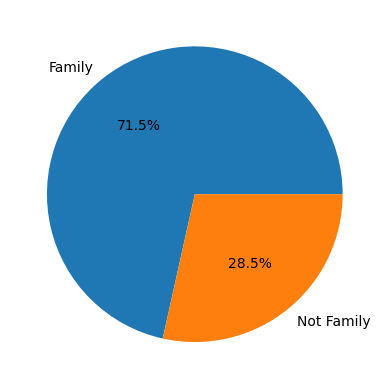

In [559]:
catFam = dfStore['isFamily'].value_counts()
display(plt.pie(catFam,
                labels=catFam.index,
                autopct='%1.1f%%'),
        catFam)

**FAMILY is the majority of population with 72% / 1602 People**

#### **COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION**

**We should look into composition of participants per campaign**  
This way, we can tell which is the most potential family to target and which family gives interest to past campaigns

In [560]:
# allFamProp = dfStore.groupby('ecoClass')[cmpAllCol].agg(['value_counts'])
# allFamProp = allFamProp.loc[allFamProp.index.get_level_values('isAcceptedCmp1') == 1].transpose()
# allFamProp

In [561]:
# allFamProp.plot(kind='bar', stacked=True)
# plt.xticks(rotation = 90)
# plt.show()

In [622]:
# CARA 2 tapi panjang tapi indexing rapih
crossTabFamCmp1 = pd.crosstab(index = dfStore['isFamily'],
                          columns= dfStore['isAcceptedCmp1']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabFamCmp2 = pd.crosstab(index = dfStore['isFamily'],
                          columns= dfStore['isAcceptedCmp2']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabFamCmp3 = pd.crosstab(index = dfStore['isFamily'],
                          columns= dfStore['isAcceptedCmp3']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabFamCmp4 = pd.crosstab(index = dfStore['isFamily'],
                          columns= dfStore['isAcceptedCmp4']).reset_index().rename({0 : '0Cmp4', 1 : '1Cmp4'}, axis = 1)
crossTabFamCmp5 = pd.crosstab(index = dfStore['isFamily'],
                          columns= dfStore['isAcceptedCmp5']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabFamCmpLast = pd.crosstab(index = dfStore['isFamily'],
                          columns= dfStore['isAcceptedCmpLast']).reset_index().rename({0 : '0CmpLast', 1 : '1CmpLast'}, axis = 1)
crossTabFamCmpAll = pd.crosstab(index = dfStore['isFamily'],
                          columns= dfStore['freqParticipationCmp'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabFamFull = crossTabFamCmp1.merge(crossTabFamCmp2, on='isFamily') \
                                .merge(crossTabFamCmp3, on='isFamily') \
                                .merge(crossTabFamCmp4, on='isFamily') \
                                .merge(crossTabFamCmp5, on='isFamily') \
                                .merge(crossTabFamCmpLast, on='isFamily') \
                                .merge(crossTabFamCmpAll, on='isFamily')
crossTabFamFull = crossTabFamFull.merge(catFam.reset_index(name = 'count').rename({'index' : 'isFamily'}, axis = 1),'inner','isFamily')
crossTabFamFull['1Cmp1Prop'] = (crossTabFamFull['1Cmp1'] / crossTabFamFull['count']) * 100
crossTabFamFull['1Cmp2Prop'] = (crossTabFamFull['1Cmp2'] / crossTabFamFull['count']) * 100
crossTabFamFull['1Cmp3Prop'] = (crossTabFamFull['1Cmp3'] / crossTabFamFull['count']) * 100
crossTabFamFull['1Cmp4Prop'] = (crossTabFamFull['1Cmp4'] / crossTabFamFull['count']) * 100
crossTabFamFull['1Cmp5Prop'] = (crossTabFamFull['1Cmp5'] / crossTabFamFull['count']) * 100
crossTabFamFull['1CmpLastProp'] = (crossTabFamFull['1CmpLast'] / crossTabFamFull['count']) * 100
crossTabFamFull['1CmpAllProp'] = (crossTabFamFull['1CmpAll'] / crossTabFamFull['count']) * 100
crossTabFamFull

,isFamily,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp4,1Cmp4,0Cmp5,1Cmp5,0CmpLast,1CmpLast,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp4Prop,1Cmp5Prop,1CmpLastProp,1CmpAllProp
0,Family,1568,34,1590,12,1487,115,1504,98,1577,25,1437,165,1278,324,1602,2.122347,0.749064,7.178527,6.117353,1.560549,10.299625,20.224719
1,Not Family,528,110,620,18,590,48,569,69,500,138,469,169,353,285,638,17.241379,2.821317,7.523511,10.815047,21.630094,26.489028,44.670846


**Here, basically we just make a crosstabulation to count frequency of each participation per campaign**  
The tables are separated by 2 type of count.  
The first one (left side) is count of 0 (not participated) and 1 (participated) per Family.  
In the middle (count) is total population per Family. So, we can calculate the proportion of participation per Family.  
The second one (right side) is proportion of participation per Family, calculated by participation count / population count per Family.

This way we can conclude which Family shape the whole campaign and which Family has more interest to the campaign.

In [563]:
crossTabFamFullPartiCount = crossTabFamFull[['isFamily','1Cmp1','1Cmp2','1Cmp3','1Cmp4','1Cmp5','1CmpLast']]
crossTabFamFullPartiProp = crossTabFamFull[['isFamily','1Cmp1Prop','1Cmp2Prop','1Cmp3Prop','1Cmp4Prop','1Cmp5Prop','1CmpLastProp']]
display(crossTabFamFullPartiCount,
        crossTabFamFullPartiProp)

,isFamily,1Cmp1,1Cmp2,1Cmp3,1Cmp4,1Cmp5,1CmpLast
0,Family,34,12,115,98,25,165
1,Not Family,110,18,48,69,138,169


,isFamily,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp4Prop,1Cmp5Prop,1CmpLastProp
0,Family,2.122347,0.749064,7.178527,6.117353,1.560549,10.299625
1,Not Family,17.241379,2.821317,7.523511,10.815047,21.630094,26.489028


**Separate the table into two tables to make a visualization for composition of participant per campaign**

First table is count table, how much participant per campaign per Family.  
This will tell which Family shape the majority of campaign participant.

Second table is proportion table, how much proportion per Family that participated in campaigns.  
This will tell which Family take interest more in the campaigns because majority of population of that Family has participated.

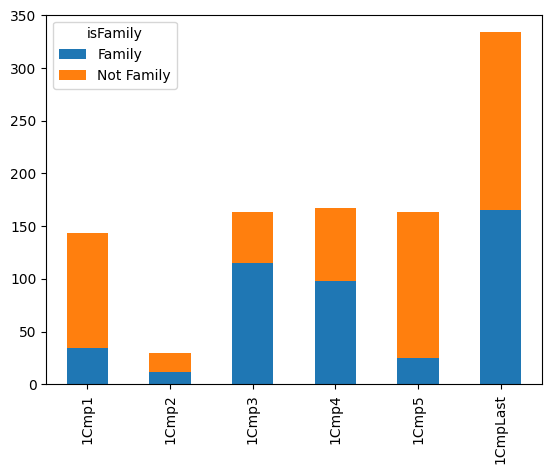

In [564]:
crossTabFamFullPartiCount.set_index('isFamily').transpose().plot.bar(stacked=True)
plt.xticks(rotation = 90)
plt.show()

**NOT FAMILY participate more than FAMILY**

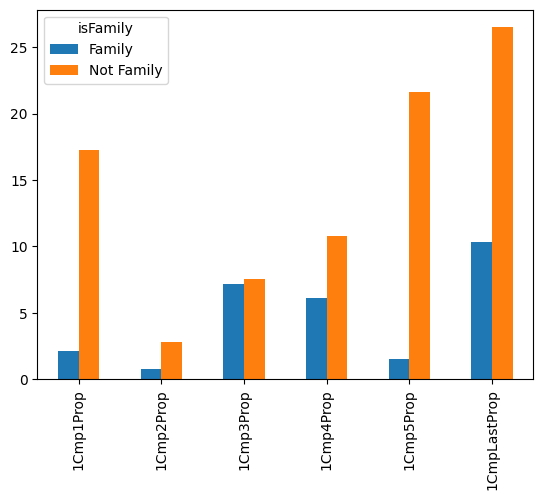

In [785]:
crossTabFamFullPartiProp.set_index('isFamily').transpose().plot.bar(stacked=False)
plt.xticks(rotation = 90)
plt.show()

**The campaign seems to take interest to NOT FAMILY**

Meanwhile, the biggest and potential pool is Family.

#### **DETAILS**

##### **All Campaign?**

In [566]:
display(((dfStore[dfStore['freqParticipationCmp'] != 0]['isFamily'].value_counts() / catFam) * 100).sort_values(ascending=False),
        dfStore[dfStore['freqParticipationCmp'] != 0]['isFamily'].value_counts())

Not Family    44.670846
Family        20.224719
Name: isFamily, dtype: float64

Family        324
Not Family    285
Name: isFamily, dtype: int64

**20% Family / 324 people of 1602 people have particiapted in Campaign**  
44% Not Family / 285 people of 638 people have participated in Campaign

##### **Last Campaign?**

In [567]:
display(((dfStore[dfStore['isAcceptedCmpLast'] == 1]['isFamily'].value_counts() / catFam) * 100).sort_values(ascending=False),
        dfStore[dfStore['isAcceptedCmpLast'] == 1]['isFamily'].value_counts())

Not Family    26.489028
Family        10.299625
Name: isFamily, dtype: float64

Not Family    169
Family        165
Name: isFamily, dtype: int64

**26% Not Family / 169 people of 638 people have participated in Last Campaign**  
10% Family / 165 people of 1602 people have particiapted in Last Campaign

##### **First 5 Campaign?**

In [568]:
display(((dfStore[dfStore[cmp1To5Col].sum(axis=1) != 0]['isFamily'].value_counts() / catFam) * 100).sort_values(ascending=False),
        dfStore[dfStore[cmp1To5Col].sum(axis=1) != 0]['isFamily'].value_counts())

Not Family    36.206897
Family        14.481898
Name: isFamily, dtype: float64

Family        232
Not Family    231
Name: isFamily, dtype: int64

**14% Family / 232 people of 1602 people have particiapted in Campaign**  
36% Not Family / 231 people of 638 people have participated in Campaign

##### **2nd Campaign?**

In [569]:
display(((dfStore[dfStore['isAcceptedCmp2'] != 0]['isFamily'].value_counts() / catFam) * 100).sort_values(ascending=False),
        dfStore[dfStore['isAcceptedCmp2'] != 0]['isFamily'].value_counts())

Not Family    2.821317
Family        0.749064
Name: isFamily, dtype: float64

Not Family    18
Family        12
Name: isFamily, dtype: int64

**2% Not Family / 18 people of 638 people have participated in Campaign**  
0.7% Family / 12 people of 1602 people have particiapted in Campaign

#### **OVERALL CONCLUSION OF FAMILY**
1. Based on proportion, Family has the highest proportion of general Family Type Demographics. Those 2 are the most potential to be digged on.  
2. There's a clear audience targetting at Family Type, being Not Family. But not targeting the largest pool, which is Family.
3. We still can't conclude what makes Last Campaign doubles the participant, while the 2nd campaign failed. All the patterns are quite the same

### **DEMOGRAPHIC CONCLUSION**

#### **Participation Rates - Evaluation**

**Let's see which category participate the most out of demography.**  
We can see it by calculating Mean for every category based on total participation.
Lowest range is 0 (the category has never participated in any campaign).  
Highest range is 5 (the category has always participated in all campaingns)

,generation,freqParticipationCmp
0,Millennials,1.899160
1,Gen X,1.603113
2,Baby Boomers,1.561086


<Axes: xlabel='generation', ylabel='freqParticipationCmp'>

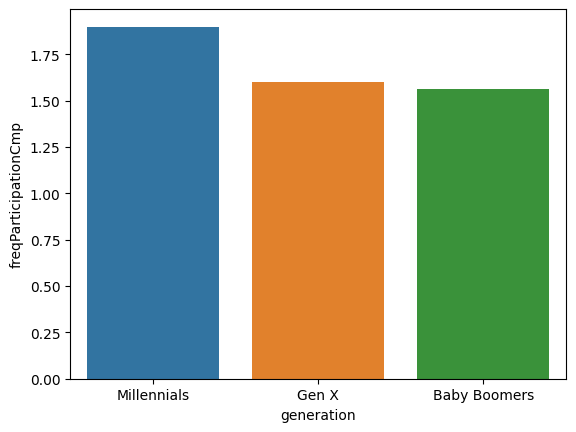

In [734]:
prGen = dfStore[dfStore['freqParticipationCmp'] != 0].groupby('generation')['freqParticipationCmp'].mean().sort_values(ascending=False)[:3].to_frame().reset_index()
display(prGen,
        sns.barplot(prGen,
                    x = 'generation',
                    y = 'freqParticipationCmp'))

In [587]:
topGen = ['Millennials','Baby Boomers','Gen X']

**Millenials tends to participate more in the campaign**  
meanwhile, Gen X is the lowest

,education,freqParticipationCmp
0,PhD,1.677215
1,Graduation,1.661074
2,Master,1.600000


<Axes: xlabel='education', ylabel='freqParticipationCmp'>

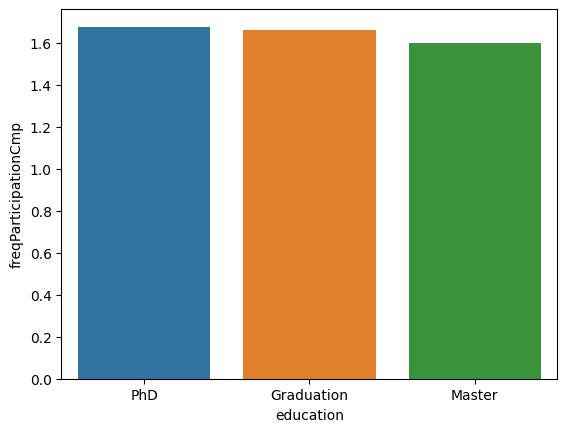

In [739]:
prEdu = dfStore[dfStore['freqParticipationCmp'] != 0].groupby('education')['freqParticipationCmp'].mean().sort_values(ascending=False)[:3].to_frame().reset_index()
display(prEdu,
        sns.barplot(prEdu,
                    x = 'education',
                    y = 'freqParticipationCmp'))

In [589]:
topEdu = ['PhD','Graduation','Master']

**PhD tends to participate more in the campaign**  
meanwhile, Master is the lowest

,statusMarital,freqParticipationCmp
0,Married,1.658986
1,Single,1.648649
2,Together,1.572414


<Axes: xlabel='statusMarital', ylabel='freqParticipationCmp'>

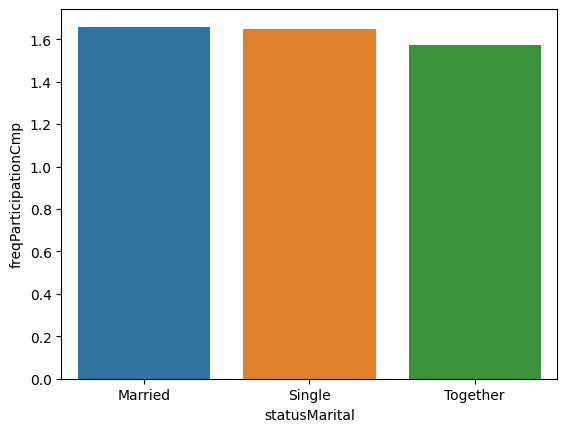

In [742]:
prMarital = dfStore[dfStore['freqParticipationCmp'] != 0].groupby('statusMarital')['freqParticipationCmp'].mean().sort_values(ascending=False)[4:7].to_frame().reset_index()
display(prMarital,
        sns.barplot(prMarital,
                    x = 'statusMarital',
                    y = 'freqParticipationCmp'))

In [591]:
topMarital = ['Single','Married','Together']

**Maried tends to participate more in the campaign**  
meanwhile, Together is the lowest
But, if we assume Married and Together is the same, Single is the smallest

,ecoClass,freqParticipationCmp
0,Lower Middle Class,1.685009
1,Lower Class,1.250000


<Axes: xlabel='ecoClass', ylabel='freqParticipationCmp'>

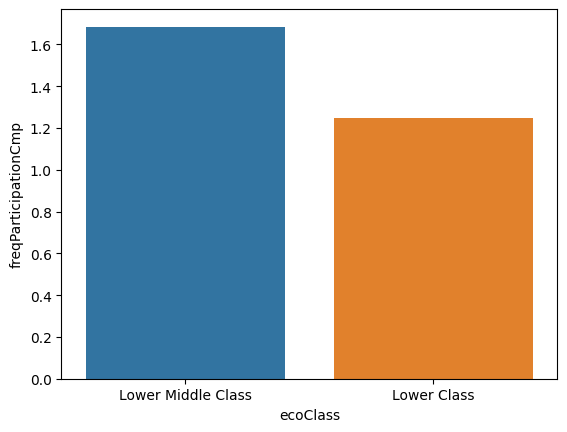

In [753]:
prEco = dfStore[dfStore['freqParticipationCmp'] != 0].groupby('ecoClass')['freqParticipationCmp'].mean().sort_values(ascending=False)[[1,-2]].to_frame().reset_index()
display(prEco,
        sns.barplot(prEco,
                    x = 'ecoClass',
                    y = 'freqParticipationCmp'))

In [593]:
topEco = ['Lower Middle Class','Working Class']

**Lower Middle Class tends to participate more in the campaign**  
meanwhile, Working Class is the lowest

,isFamily,freqParticipationCmp
0,Not Family,1.936842
1,Family,1.385802


<Axes: xlabel='isFamily', ylabel='freqParticipationCmp'>

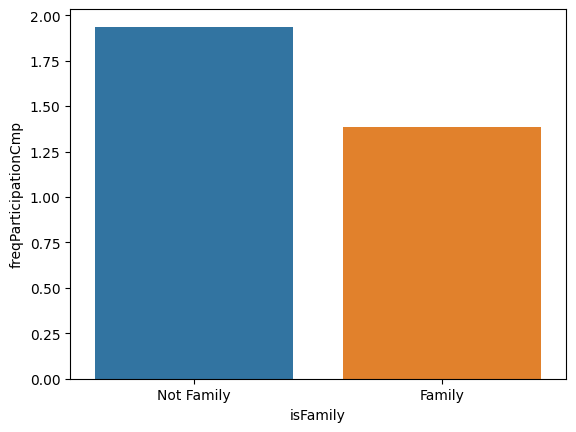

In [744]:
prFam = dfStore[dfStore['freqParticipationCmp'] != 0].groupby('isFamily')['freqParticipationCmp'].mean().sort_values(ascending=False).to_frame().reset_index()
display(prFam,
        sns.barplot(prFam,
                    x = 'isFamily',
                    y = 'freqParticipationCmp'))

**Not Family Class tends to participate more in the campaign**  
meanwhile, Family is the lowest

**Most of the categories that took interest in the past campaigns were not the most potential pool of categories.**  
This could be the cause why the campaign didn't catch much participant.

#### **Population Demography Summary**

**Graphs below are top potential category per demography**  
Taken from prior analysis.

([<matplotlib.patches.Wedge at 0x14534f310>,
 [Text(0.0786130431084146, 1.0971873082811496, 'Gen X'),
  Text(-0.6651410072872863, -0.8761206768618434, 'Baby Boomers'),
  Text(0.8980087857147295, -0.6352796398273419, 'Millennials'),
  Text(1.0990264779056393, -0.046268789289601514, 'Silent Generation'),
  Text(1.099990263165153, -0.004628276337676231, 'Greatest Generation')],
 [Text(0.042879841695498876, 0.5984658045169907, '47.7%'),
  Text(-0.3628041857930652, -0.4778840055610054, '33.9%'),
  Text(0.489822974026216, -0.3465161671785501, '17.2%'),
  Text(0.5994689879485304, -0.02523752143069173, '1.1%'),
  Text(0.5999946889991743, -0.002524514366005217, '0.1%')])

Gen X                  1069
Baby Boomers            759
Millennials             385
Silent Generation        24
Greatest Generation       3
Name: generation, dtype: int64

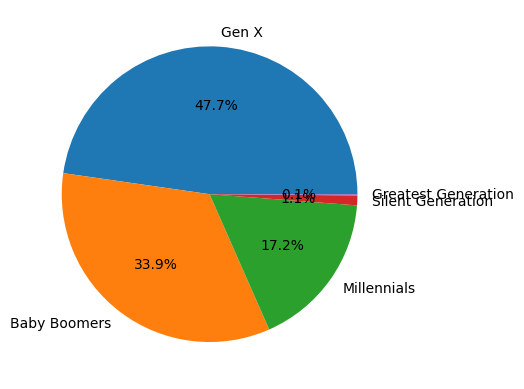

In [581]:
catGen = dfStore['generation'].value_counts()
display(plt.pie(catGen,
                labels=catGen.index,
                autopct='%1.1f%%'),
        catGen)

([<matplotlib.patches.Wedge at 0x1454372d0>,
 [Text(-0.010799092464652335, 1.099946989450828, 'Graduation'),
  Text(-0.840441051704004, -0.7096892549635142, 'PhD'),
  Text(0.3574766803682644, -1.0402934311976049, 'Master'),
  Text(0.9970110351959686, -0.46472464502914335, '2n Cycle'),
  Text(1.09684684539309, -0.083228587343696, 'Basic')],
 [Text(-0.005890414071628546, 0.5999710851549971, '50.3%'),
  Text(-0.45842239183854755, -0.38710322998009866, '21.7%'),
  Text(0.1949872802008715, -0.567432780653239, '16.5%'),
  Text(0.5438242010159828, -0.25348617001589635, '9.1%'),
  Text(0.59828009748714, -0.04539741127837963, '2.4%')])

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64

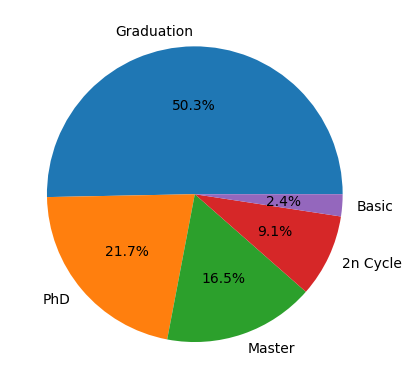

In [582]:
catEdu = dfStore['education'].value_counts()
display(plt.pie(catEdu,
                labels=catEdu.index,
                autopct='%1.1f%%'),
        catEdu)

([<matplotlib.patches.Wedge at 0x1454c56d0>,
 [Text(0.38651228445009445, 1.0298583659752294, 'Married'),
  Text(-1.095001320486733, -0.10474783115802916, 'Together'),
  Text(0.012341737200255306, -1.0999307621495455, 'Single'),
  Text(0.9313966387202842, -0.585235253022711, 'Divorced'),
  Text(1.091053373137542, -0.1400090602967946, 'Widow'),
  Text(1.099869099659501, -0.016969490687659825, 'Alone'),
  Text(1.0999610540804825, -0.009256322496208415, 'Absurd'),
  Text(1.0999956727401774, -0.0030854420890123325, 'YOLO')],
 [Text(0.21082488242732422, 0.5617409268955795, '38.6%'),
  Text(-0.597273447538218, -0.05713518063165226, '25.9%'),
  Text(0.006731856654684711, -0.599962233899752, '21.4%'),
  Text(0.508034530211064, -0.31921922892147864, '10.4%'),
  Text(0.5951200217113866, -0.07636857834370614, '3.4%'),
  Text(0.5999285998142733, -0.00925608582963263, '0.1%'),
  Text(0.5999787567711722, -0.005048903179750044, '0.1%'),
  Text(0.5999976396764604, -0.0016829684121885448, '0.1%')])

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: statusMarital, dtype: int64

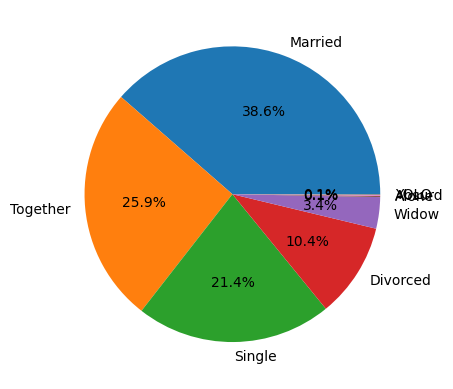

In [583]:
catMarital = dfStore['statusMarital'].value_counts()
display(plt.pie(catMarital,
                labels=catMarital.index,
                autopct='%1.1f%%'),
        catMarital)

([<matplotlib.patches.Wedge at 0x14549ce10>,
 [Text(-0.7756325792908255, 0.7799962191848506, 'Lower Middle Class'),
  Text(0.6858386670154847, -0.8600147224474841, 'Working Class'),
  Text(1.0910533477396227, -0.1400092582158839, 'Lower Class'),
  Text(1.0997879614276573, -0.021597219700641396, 'Upper Middle Class'),
  Text(1.0999989179308811, -0.001542903396509121, 'Upper Class')],
 [Text(-0.4230723159768139, 0.4254524831917367, '74.9%'),
  Text(0.37409381837208255, -0.4690989395168095, '21.6%'),
  Text(0.595120007857976, -0.07636868629957302, '2.9%'),
  Text(0.5998843425969039, -0.011780301654895306, '0.5%'),
  Text(0.5999994097804805, -0.0008415836708231568, '0.0%')])

Lower Middle Class    1678
Working Class          484
Lower Class             65
Upper Middle Class      12
Upper Class              1
Name: ecoClass, dtype: int64

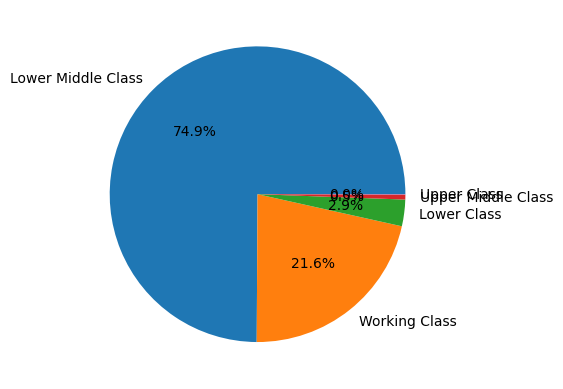

In [584]:
catEco = dfStore['ecoClass'].value_counts()
display(plt.pie(catEco,
                labels=catEco.index,
                autopct='%1.1f%%'),
        catEco)

([<matplotlib.patches.Wedge at 0x14547af10>,
 [Text(-0.688248356514243, 0.8580875245308276, 'Family'),
  Text(0.6882482761742877, -0.8580875889692856, 'Not Family')],
 [Text(-0.3754081944623143, 0.4680477406531786, '71.5%'),
  Text(0.3754081506405205, -0.4680477758014285, '28.5%')])

Family        1602
Not Family     638
Name: isFamily, dtype: int64

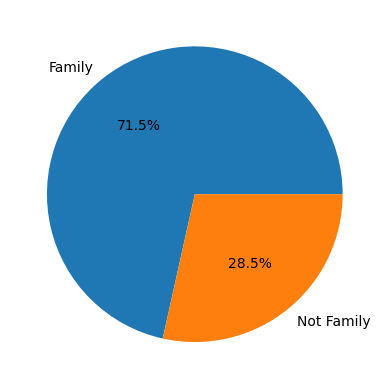

In [585]:
catFam = dfStore['isFamily'].value_counts()
display(plt.pie(catFam,
                labels=catFam.index,
                autopct='%1.1f%%'),
        catFam)

**The Highest Proportion based on these graphs**
1. Lower Middle Class (75%)
2. Family (72%)
3. Couple - Married (39%) and Together (26%) = (65%)
4. Graduation (50%)
5. Gen X (48%)

**Again, these categories are the most potential to be targeted if we want larger audience**

#### **Sample Demographic**

**Based on demographic conclusion, we already know which category that stands out per demography**  
Let's try to count the combination of each category.

In [579]:
for i in dfStore['generation'].unique() :
    for k in dfStore['education'].unique() :
        for m in dfStore['statusMarital'].unique() :
            for n in dfStore['ecoClass'].unique() :
                for o in dfStore['isFamily'].unique() :
                    countN = dfStore[(dfStore['generation'] == i)
                                    & (dfStore['education'] == k)
                                    & (dfStore['statusMarital'] == m)
                                    & (dfStore['ecoClass'] == n)
                                    & (dfStore['isFamily'] == o)]['id'].count()
                    print(f'{i} + {k} + {m} + {n} + {o} = {countN}')


Baby Boomers + Graduation + Single + Lower Middle Class + Not Family = 26
Baby Boomers + Graduation + Single + Lower Middle Class + Family = 38
Baby Boomers + Graduation + Single + Working Class + Not Family = 3
Baby Boomers + Graduation + Single + Working Class + Family = 4
Baby Boomers + Graduation + Single + Lower Class + Not Family = 1
Baby Boomers + Graduation + Single + Lower Class + Family = 0
Baby Boomers + Graduation + Single + Upper Middle Class + Not Family = 0
Baby Boomers + Graduation + Single + Upper Middle Class + Family = 0
Baby Boomers + Graduation + Single + Upper Class + Not Family = 0
Baby Boomers + Graduation + Single + Upper Class + Family = 0
Baby Boomers + Graduation + Together + Lower Middle Class + Not Family = 28
Baby Boomers + Graduation + Together + Lower Middle Class + Family = 60
Baby Boomers + Graduation + Together + Working Class + Not Family = 2
Baby Boomers + Graduation + Together + Working Class + Family = 15
Baby Boomers + Graduation + Together + Lo

In [580]:
dictComb = {'combination' : [],
            'countN' : []}

for i in dfStore['generation'].unique() :
    for k in dfStore['education'].unique() :
        for m in dfStore['statusMarital'].unique() :
            for n in dfStore['ecoClass'].unique() :
                for o in dfStore['isFamily'].unique() :
                    countN = dfStore[(dfStore['generation'] == i)
                                    & (dfStore['education'] == k)
                                    & (dfStore['statusMarital'] == m)
                                    & (dfStore['ecoClass'] == n)
                                    & (dfStore['isFamily'] == o)]['id'].count()
                    for p in dictComb :
                        if p == 'combination' :
                            dictComb[p].append([i , k , m , n , o])
                        else :
                            dictComb[p].append(countN)

dfComb = pd.DataFrame(dictComb)
dfComb.sort_values('countN', ascending=False)

,combination,countN
421,"[Gen X, Graduation, Married, Lower Middle Class, Family]",132
21,"[Baby Boomers, Graduation, Married, Lower Middle Class, Family]",71
411,"[Gen X, Graduation, Together, Lower Middle Class, Family]",71
501,"[Gen X, PhD, Married, Lower Middle Class, Family]",65
11,"[Baby Boomers, Graduation, Together, Lower Middle Class, Family]",60
...,...,...
758,"[Gen X, 2n Cycle, Divorced, Upper Class, Not Family]",0
757,"[Gen X, 2n Cycle, Divorced, Upper Middle Class, Family]",0
756,"[Gen X, 2n Cycle, Divorced, Upper Middle Class, Not Family]",0
752,"[Gen X, 2n Cycle, Divorced, Working Class, Not Family]",0


**if we get all the highest demographics combined, we only get 132 People at max**

So, it better to **make hierarchy or priority which Demography we should focus on more.**

But, still the higest demography combined match the result from analysis per demography.

The priority should follow:
1. Lower Middle Class (75%)
2. Family (72%)
3. Couple - Married (39%) and Together (26%) = (65%)
4. Graduation (50%)
5. Gen X (48%)

#### **Correlation Test**

**We think, we should aim for bigger pool of audience categories to catch more participant**  
But we need to prove that bigger audience will give us more participant.

Total population per category correlates as much as 0.96 to number or participant


,type,category,countFull,countPartic
0,generation,Gen X,1069,257
1,generation,Baby Boomers,759,221
2,generation,Millennials,385,119
3,generation,Silent Generation,24,11
4,generation,Greatest Generation,3,1
0,education,Graduation,1127,298
1,education,PhD,486,158
2,education,Master,370,100
3,education,2n Cycle,203,46
4,education,Basic,54,7


<Axes: xlabel='countPartic', ylabel='countFull'>

<Axes: xlabel='countPartic', ylabel='countFull'>

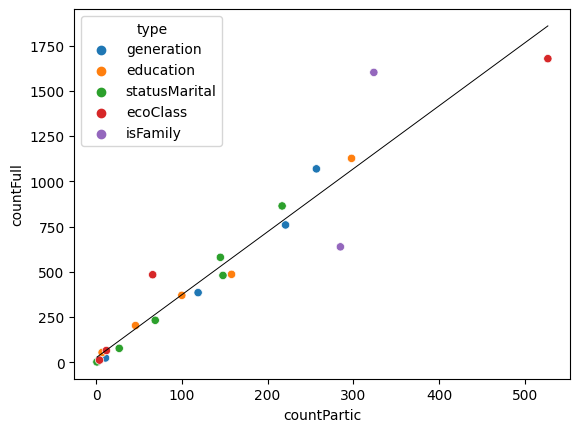

In [755]:
genPartic = pd.merge(catGen.to_frame().reset_index().rename({'generation' : 'countFull', 'index' : 'generation'}, axis = 1),
                     dfStore[dfStore['freqParticipationCmp'] != 0].groupby('generation')['generation'].value_counts().droplevel(0).to_frame().rename({'generation' : 'countPartic'}, axis = 1).reset_index(),
                     'inner',
                     'generation').rename({'generation' : 'category'}, axis=1)
genPartic['type'] = 'generation'
genPartic = genPartic[['type'] + genPartic.columns[:-1].tolist()]
eduPartic = pd.merge(catEdu.to_frame().reset_index().rename({'education' : 'countFull', 'index' : 'education'}, axis = 1),
                     dfStore[dfStore['freqParticipationCmp'] != 0].groupby('education')['education'].value_counts().droplevel(0).to_frame().rename({'education' : 'countPartic'}, axis = 1).reset_index(),
                     'inner',
                     'education').rename({'education' : 'category'}, axis=1)
eduPartic['type'] = 'education'
eduPartic = eduPartic[['type'] + eduPartic.columns[:-1].tolist()]
maritalPartic = pd.merge(catMarital.to_frame().reset_index().rename({'statusMarital' : 'countFull', 'index' : 'statusMarital'}, axis = 1),
                     dfStore[dfStore['freqParticipationCmp'] != 0].groupby('statusMarital')['statusMarital'].value_counts().droplevel(0).to_frame().rename({'statusMarital' : 'countPartic'}, axis = 1).reset_index(),
                     'inner',
                     'statusMarital').rename({'statusMarital' : 'category'}, axis=1)
maritalPartic['type'] = 'statusMarital'
maritalPartic = maritalPartic[['type'] + maritalPartic.columns[:-1].tolist()]
ecoPartic = pd.merge(catEco.to_frame().reset_index().rename({'ecoClass' : 'countFull', 'index' : 'ecoClass'}, axis = 1),
                     dfStore[dfStore['freqParticipationCmp'] != 0].groupby('ecoClass')['ecoClass'].value_counts().droplevel(0).to_frame().rename({'ecoClass' : 'countPartic'}, axis = 1).reset_index(),
                     'inner',
                     'ecoClass').rename({'ecoClass' : 'category'}, axis=1)
ecoPartic['type'] = 'ecoClass'
ecoPartic = ecoPartic[['type'] + ecoPartic.columns[:-1].tolist()]
famPartic = pd.merge(catFam.to_frame().reset_index().rename({'isFamily' : 'countFull', 'index' : 'isFamily'}, axis = 1),
                     dfStore[dfStore['freqParticipationCmp'] != 0].groupby('isFamily')['isFamily'].value_counts().droplevel(0).to_frame().rename({'isFamily' : 'countPartic'}, axis = 1).reset_index(),
                     'inner',
                     'isFamily').rename({'isFamily' : 'category'}, axis=1)
famPartic['type'] = 'isFamily'
famPartic = famPartic[['type'] + famPartic.columns[:-1].tolist()]

demoPartic = pd.concat([genPartic,eduPartic,maritalPartic,ecoPartic,famPartic])
demoCorr = demoPartic['countFull'].corr(demoPartic['countPartic'])

print(f'Total population per category correlates as much as {round(demoCorr,2)} to number or participant')
display(demoPartic,
        sns.scatterplot(demoPartic,
                        x = 'countPartic',
                        y = 'countFull',
                        hue = 'type'),
        sns.regplot(demoPartic,
                    x = 'countPartic',
                    y = 'countFull',
                    scatter = False,
                    ci = None,
                    color = 'black',
                    line_kws={'linewidth': 0.7}))

**Total population per category correlates as much as *0.96* to number or participant**  
It means, the higher the population, will contribute to higher participant.  
Thus, we should aim for bigger population.

## **IS DISCOUNT NEEDED?**

### **Discount Overview**

**Discount is important element to supermarket activity**  
We should consider whether discount can be integrated to the campaign

([<matplotlib.patches.Wedge at 0x1454ccb90>,
 [Text(-1.0977116042394406, 0.07091709186136891, 'Y'),
  Text(1.0977116058993748, -0.07091706616757437, 'N')],
 [Text(-0.5987517841306039, 0.03868205010620122, '97.9%'),
  Text(0.5987517850360226, -0.0386820360914042, '2.1%')])

,isParticDisc,countDisc
0,Y,2194
1,N,46


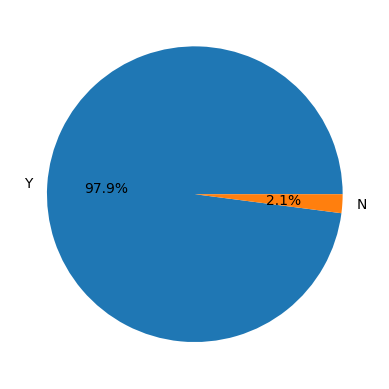

In [600]:
dictHaveDisc = {'isParticDisc' : ['Y','N'],
                'countDisc': [dfStore[dfStore['discPurchase'] != 0]['id'].count(),dfStore[dfStore['discPurchase'] == 0]['id'].count()]}

dfHaveDisc = pd.DataFrame(dictHaveDisc)
display(plt.pie(dfHaveDisc['countDisc'],
                labels=dfHaveDisc['isParticDisc'],
                autopct='%1.1f%%'),
        dfHaveDisc)

**Discount might NEEDED because most of the population has ever bougth when price is discounted**

In [601]:
discRate = (dfStore['discPurchase'].sum() / dfStore['freqPurchase'].sum()) * 100
f'{round(discRate)}%'

'19%'

**But, based on ratio to purchase made, purchase on discount is quite small. Only 19%**  
it means only 1 purchase made with discount out of 5 purchase.
but, this could because the discounted items were not needed items by the population.  
So, not many purchase made with discount.

**We CAN'T conclude which product is the best based on this data**  
because the data only tells amount spent on products (USD).  

**but we still can choose discounted products based on Demographics needs to boost participation in campaign.**  
As we concluded before, discount can also made as a tool to target the audience.

### **Demography Breakdown - Evaluation**

#### **GENERATION**

##### **TOP GENERATION HAS PARTICIPATED IN DISCOUNT**

,generation,participated,not participated
0,Millennials,98.441558,1.558442
1,Baby Boomers,97.891963,2.108037
2,Gen X,97.942002,2.057998


<Axes: xlabel='generation'>

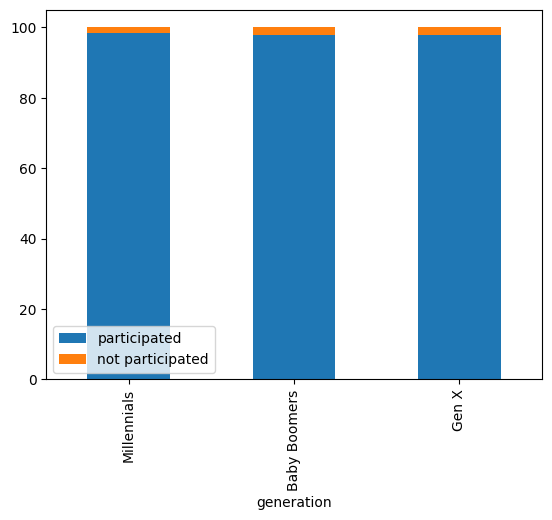

In [773]:
discGen = ((dfStore[dfStore['discPurchase'] != 0]['generation'].value_counts() / catGen) * 100).loc[topGen].to_frame().reset_index()
discGen = discGen.merge(((dfStore[dfStore['discPurchase'] == 0]['generation'].value_counts() / catGen) * 100).loc[topGen].to_frame().reset_index(),
                        'inner',
                        'index').rename({'index' : 'generation',
                                         'generation_x' : 'participated',
                                         'generation_y' : 'not participated'},
                                         axis=1)
display(discGen,
        discGen.set_index('generation').plot.bar(stacked=True))

**Overall, all generation participated in discount**

##### **DISCOUNT PURCHASE RATE PER GENERATION**

,generation,buyRate,notBuyRate
0,Millennials,15.748950,84.251050
1,Baby Boomers,17.351255,82.648745
2,Gen X,20.950954,79.049046


<Axes: xlabel='generation'>

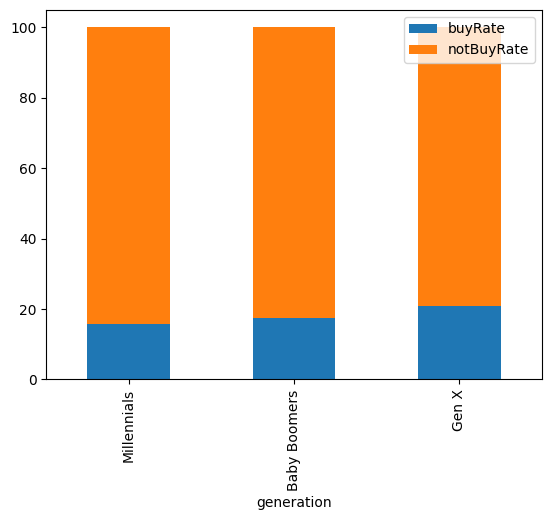

In [792]:
discRateGen = ((dfStore.groupby('generation')['discPurchase'].sum() / dfStore.groupby('generation')['freqPurchase'].sum()) * 100).loc[topGen].to_frame().reset_index()
discRateGen = discRateGen.merge((100 - ((dfStore.groupby('generation')['discPurchase'].sum() / dfStore.groupby('generation')['freqPurchase'].sum()) * 100)).loc[topGen].to_frame().reset_index(),
                                'inner',
                                'generation').rename({'0_x' : 'buyRate',
                                                      '0_y' : 'notBuyRate'},
                                                      axis=1)
display(discRateGen,
        discRateGen.set_index('generation').plot.bar(stacked=True))

**But, the rate per purchase is still quite small**  
The product doesn't seem to match the need of generation category.  
Overall, 1 purchase made with discount out of 5 purchase.  
A small tendency was towards Gen X who bought more in discount.

#### **EDUCATION**

##### **TOP EDUCATION HAS PARTICIPATED IN DISCOUNT**

,education,participated,not participated
0,PhD,97.325103,2.674897
1,Graduation,97.959184,2.040816
2,Master,98.108108,1.891892


<Axes: xlabel='education'>

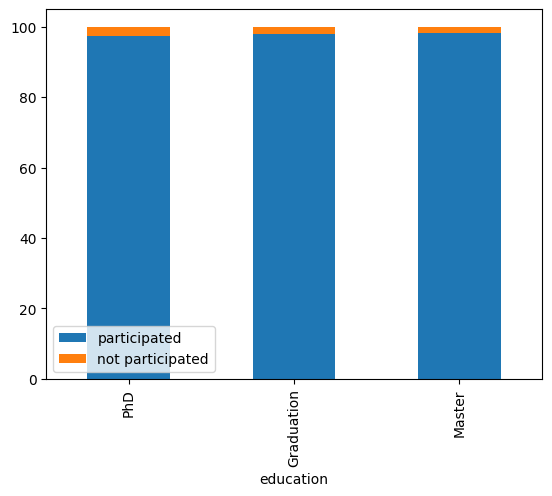

In [775]:
discEdu = ((dfStore[dfStore['discPurchase'] != 0]['education'].value_counts() / catEdu) * 100).loc[topEdu].to_frame().reset_index()
discEdu = discEdu.merge(((dfStore[dfStore['discPurchase'] == 0]['education'].value_counts() / catEdu) * 100).loc[topEdu].to_frame().reset_index(),
                        'inner',
                        'index').rename({'index' : 'education',
                                         'education_x' : 'participated',
                                         'education_y' : 'not participated'},
                                         axis=1)
display(discEdu,
        discEdu.set_index('education').plot.bar(stacked=True))

**Overall, all education participated in discount**

##### **DISCOUNT PURCHASE RATE PER EDUCATION**

,education,buyRate,notBuyRate
0,PhD,17.647958,82.352042
1,Graduation,18.214261,81.785739
2,Master,19.416216,80.583784


<Axes: xlabel='education'>

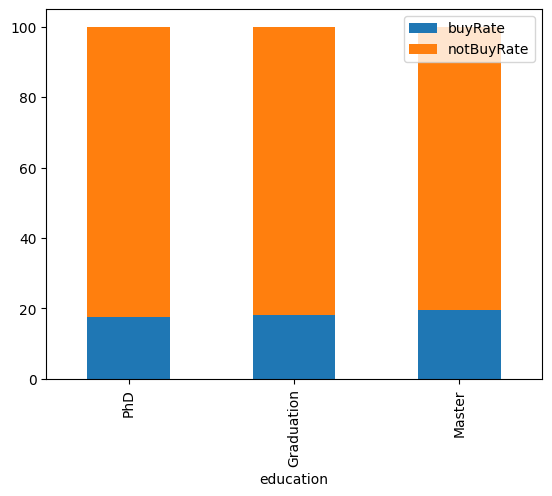

In [793]:
discRateEdu = ((dfStore.groupby('education')['discPurchase'].sum() / dfStore.groupby('education')['freqPurchase'].sum()) * 100).loc[topEdu].to_frame().reset_index()
discRateEdu = discRateEdu.merge((100 - ((dfStore.groupby('education')['discPurchase'].sum() / dfStore.groupby('education')['freqPurchase'].sum()) * 100)).loc[topEdu].to_frame().reset_index(),
                                'inner',
                                'education').rename({'0_x' : 'buyRate',
                                                      '0_y' : 'notBuyRate'},
                                                      axis=1)
display(discRateEdu,
        discRateEdu.set_index('education').plot.bar(stacked=True))

**But, the rate per purchase is still quite small**  
The product doesn't seem to match the need of education category.  
Overall, 1 purchase made with discount out of 5 purchase.  
A small tendency was towards Master who bought more in discount.

#### **MARITAL**

##### **TOP MARITAL HAS PARTICIPATED IN DISCOUNT**

,statusMarital,participated,not participated
0,Single,96.875000,3.125000
1,Married,98.842593,1.157407
2,Together,97.758621,2.241379


<Axes: xlabel='statusMarital'>

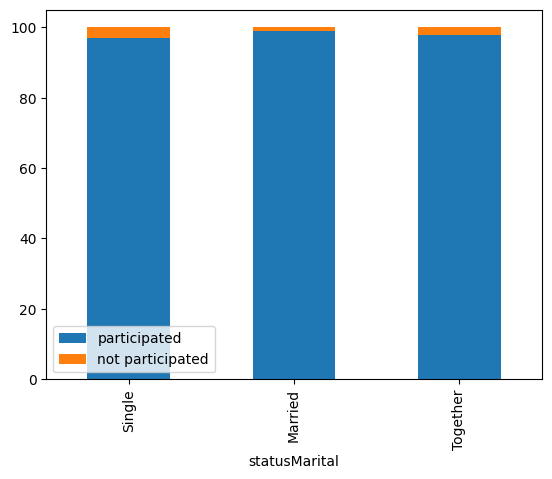

In [777]:
discMarital = ((dfStore[dfStore['discPurchase'] != 0]['statusMarital'].value_counts() / catMarital) * 100).loc[topMarital].to_frame().reset_index()
discMarital = discMarital.merge(((dfStore[dfStore['discPurchase'] == 0]['statusMarital'].value_counts() / catMarital) * 100).loc[topMarital].to_frame().reset_index(),
                        'inner',
                        'index').rename({'index' : 'statusMarital',
                                         'statusMarital_x' : 'participated',
                                         'statusMarital_y' : 'not participated'},
                                         axis=1)
display(discMarital,
        discMarital.set_index('statusMarital').plot.bar(stacked=True))

**Overall, all marital participated in discount**

##### **DISCOUNT PURCHASE RATE PER MARITAL**

,statusMarital,buyRate,notBuyRate
0,Single,17.595459,82.404541
1,Married,19.041916,80.958084
2,Together,18.603367,81.396633


<Axes: xlabel='statusMarital'>

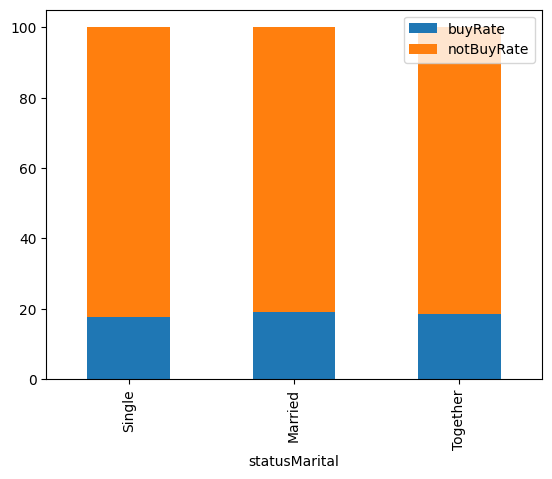

In [794]:
discRateMarital = ((dfStore.groupby('statusMarital')['discPurchase'].sum() / dfStore.groupby('statusMarital')['freqPurchase'].sum()) * 100).loc[topMarital].to_frame().reset_index()
discRateMarital = discRateMarital.merge((100 - ((dfStore.groupby('statusMarital')['discPurchase'].sum() / dfStore.groupby('statusMarital')['freqPurchase'].sum()) * 100)).loc[topMarital].to_frame().reset_index(),
                                'inner',
                                'statusMarital').rename({'0_x' : 'buyRate',
                                                      '0_y' : 'notBuyRate'},
                                                      axis=1)
display(discRateMarital,
        discRateMarital.set_index('statusMarital').plot.bar(stacked=True))

**But, the rate per purchase is still quite small**  
The product doesn't seem to match the need of marital category.  
Overall, 1 purchase made with discount out of 5 purchase.  
A small tendency was towards Married and Together who bought more in discount.

#### **ECONOMIC CLASS**

##### **TOP ECO CLASS HAS PARTICIPATED IN DISCOUNT**

,ecoClass,participated,not participated
0,Lower Middle Class,98.212157,1.787843
1,Working Class,100.000000,NaN


<Axes: xlabel='ecoClass'>

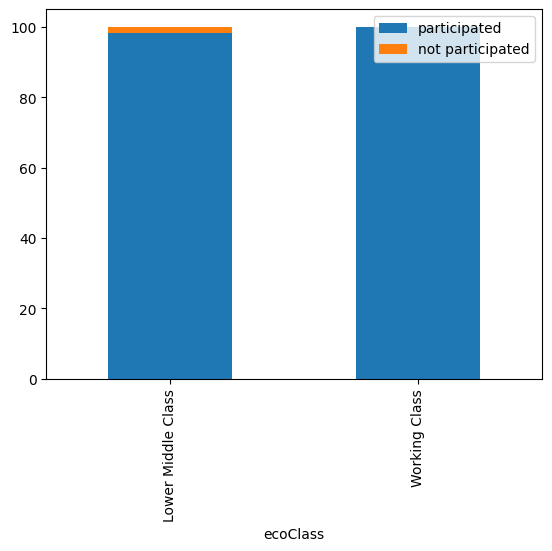

In [778]:
discEco = ((dfStore[dfStore['discPurchase'] != 0]['ecoClass'].value_counts() / catEco) * 100).loc[topEco].to_frame().reset_index()
discEco = discEco.merge(((dfStore[dfStore['discPurchase'] == 0]['ecoClass'].value_counts() / catEco) * 100).loc[topEco].to_frame().reset_index(),
                        'inner',
                        'index').rename({'index' : 'ecoClass',
                                         'ecoClass_x' : 'participated',
                                         'ecoClass_y' : 'not participated'},
                                         axis=1)
display(discEco,
        discEco.set_index('ecoClass').plot.bar(stacked=True))

**Overall, all economic class participated in discount**

##### **DISCOUNT PURCHASE RATE PER ECO CLASS**

,ecoClass,buyRate,notBuyRate
0,Lower Middle Class,16.276733,83.723267
1,Working Class,35.763359,64.236641


<Axes: xlabel='ecoClass'>

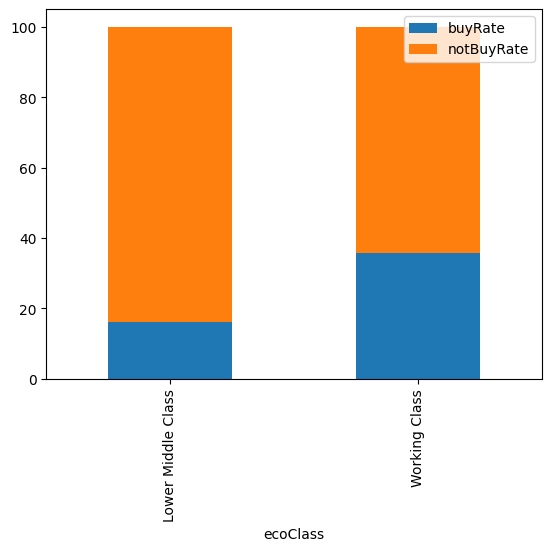

In [795]:
discRateEco = ((dfStore.groupby('ecoClass')['discPurchase'].sum() / dfStore.groupby('ecoClass')['freqPurchase'].sum()) * 100).loc[topEco].to_frame().reset_index()
discRateEco = discRateEco.merge((100 - ((dfStore.groupby('ecoClass')['discPurchase'].sum() / dfStore.groupby('ecoClass')['freqPurchase'].sum()) * 100)).loc[topEco].to_frame().reset_index(),
                                'inner',
                                'ecoClass').rename({'0_x' : 'buyRate',
                                                      '0_y' : 'notBuyRate'},
                                                      axis=1)
display(discRateEco,
        discRateEco.set_index('ecoClass').plot.bar(stacked=True))

**The rate per purchase is a bit better**  
The product seems to answer the need of one economic class category.  
Working Class seems to participate more in discount. 1 of 3 purchase was made in discount.

#### **FAMILY**

##### **TOP FAMILY HAS PARTICIPATED IN DISCOUNT**

,isFamily,participated,not participated
0,Family,99.500624,0.499376
1,Not Family,94.043887,5.956113


<Axes: xlabel='isFamily'>

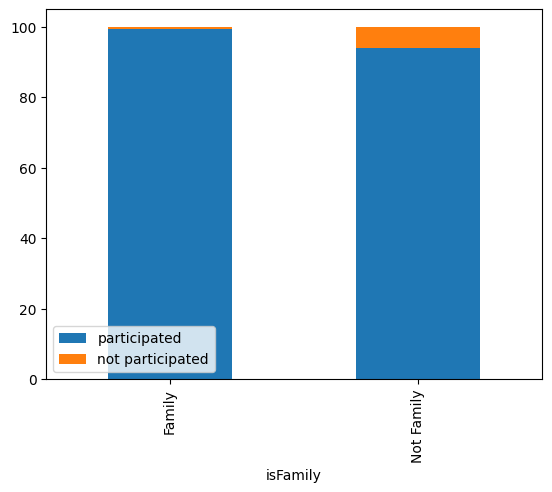

In [780]:
discFam = ((dfStore[dfStore['discPurchase'] != 0]['isFamily'].value_counts() / catFam) * 100).to_frame().reset_index()
discFam = discFam.merge(((dfStore[dfStore['discPurchase'] == 0]['isFamily'].value_counts() / catFam) * 100).to_frame().reset_index(),
                        'inner',
                        'index').rename({'index' : 'isFamily',
                                         'isFamily_x' : 'participated',
                                         'isFamily_y' : 'not participated'},
                                         axis=1)
display(discFam,
        discFam.set_index('isFamily').plot.bar(stacked=True))

**Overall, all family participated in discount**

##### **DISCOUNT PURCHASE RATE PER FAMILY**

,isFamily,buyRate,notBuyRate
0,Family,25.447214,74.552786
1,Not Family,6.940997,93.059003


<Axes: xlabel='isFamily'>

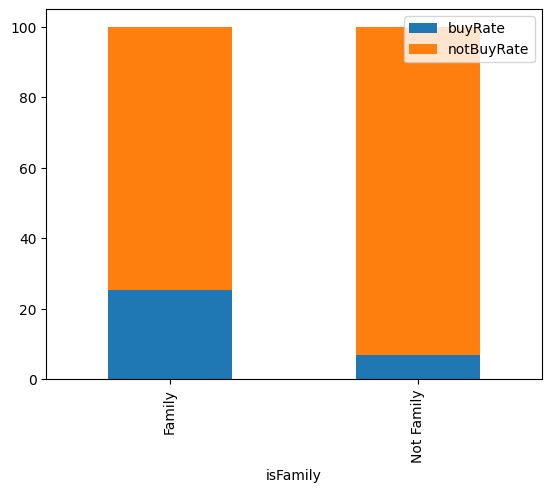

In [796]:
discRateFam = ((dfStore.groupby('isFamily')['discPurchase'].sum() / dfStore.groupby('isFamily')['freqPurchase'].sum()) * 100).to_frame().reset_index()
discRateFam = discRateFam.merge((100 - ((dfStore.groupby('isFamily')['discPurchase'].sum() / dfStore.groupby('isFamily')['freqPurchase'].sum()) * 100)).to_frame().reset_index(),
                                'inner',
                                'isFamily').rename({'0_x' : 'buyRate',
                                                      '0_y' : 'notBuyRate'},
                                                      axis=1)
display(discRateFam,
        discRateFam.set_index('isFamily').plot.bar(stacked=True))

**The rate per purchase is a bit better**  
The product seems to answer the need of one family category.  
Family seems to participate more in discount. 1 of 4 purchase was made in discount.

### **Discount Conclusion**

So, we can use Discount as a tool to attract more participant, but we must target the discounted items based on needs of every category in demography.  
If we look at past campaings, the discounted items seems to attract Working Class (1 out of 3 purchase) and Family (1 out of 4 purchase).  
As mentioned before, it could be better if we target bigger population.

These are top most potential demography we could target based on priority:

1. Lower Middle Class (75%)
2. Family (72%)
3. Couple - Married and Together (64%)
4. Graduation (50%)
5. Gen X (48%)

## **CHANNEL OF PURCHASE**

numWebPurchase        2191
numCatalogPurchase    1654
numStorePurchase      2225
dtype: int64

([<matplotlib.patches.Wedge at 0x1494d4d10>,
 [Text(0.4653673818834556, 0.9967111918098132, 'numWebPurchase'),
  Text(-1.0998296915859183, 0.01935586489992063, 'numCatalogPurchase'),
  Text(0.4477568667635787, -1.0047456336138332, 'numStorePurchase')],
 [Text(0.2538367537546121, 0.5436606500780798, '36.1%'),
  Text(-0.5999071045014099, 0.010557744490865797, '27.2%'),
  Text(0.24423101823467924, -0.5480430728802725, '36.7%')])

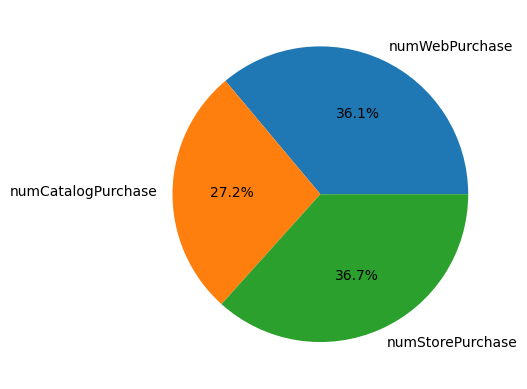

In [808]:
particChannel = pd.Series([dfStore[dfStore['numWebPurchase'] != 0]['id'].count(),
                            dfStore[dfStore['numCatalogPurchase'] != 0]['id'].count(),
                            dfStore[dfStore['numStorePurchase'] != 0]['id'].count()],
                        ['numWebPurchase','numCatalogPurchase','numStorePurchase'])
display(particChannel,
        plt.pie(particChannel,
                labels = particChannel.index,
                autopct = '%1.1f%%'))

**Store and Web is the most used channel of purchase.**

numWebPurchase         9150
numCatalogPurchase     5963
numStorePurchase      12970
dtype: int64

([<matplotlib.patches.Wedge at 0x141117310>,
 [Text(0.5723307310046404, 0.9393814637024163, 'numWebPurchase'),
  Text(-1.0010802364538074, 0.4558929262245568, 'numCatalogPurchase'),
  Text(0.13153783563227645, -1.0921070450268033, 'numStorePurchase')],
 [Text(0.3121803987298038, 0.5123898892922271, '32.6%'),
  Text(-0.5460437653384403, 0.2486688688497582, '21.2%'),
  Text(0.07174791034487805, -0.5956947518328017, '46.2%')])

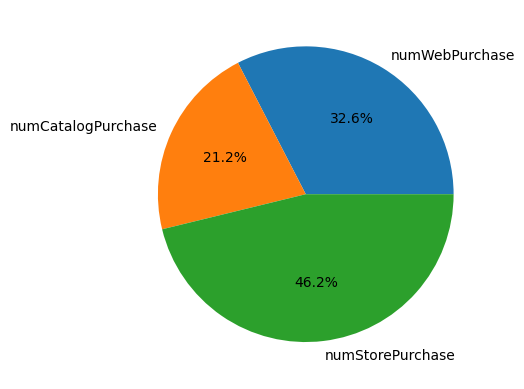

In [706]:
purchChannelAll = dfStore[['numWebPurchase','numCatalogPurchase','numStorePurchase']].sum()
display(purchChannelAll,
        plt.pie(purchChannelAll,
                labels = purchChannelAll.index,
                autopct = '%1.1f%%'))

**Store generates most purchase out of all channels.**

,generation,numWebPurchase,numCatalogPurchase,numStorePurchase
0,Millennials,3.446753,2.410390,5.275325
1,Baby Boomers,4.445323,3.205534,6.366271
2,Gen X,4.006548,2.320861,5.536015


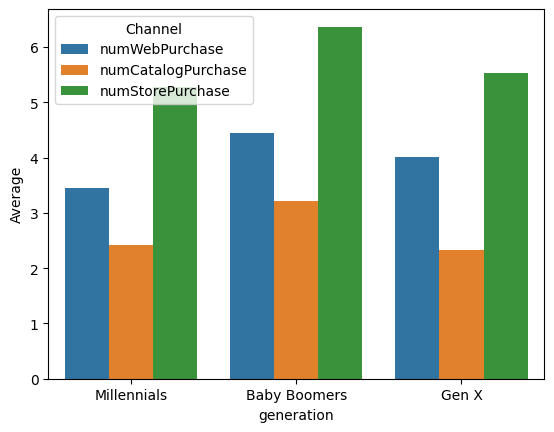

In [800]:
purchChannelGen = dfStore.groupby('generation')[['numWebPurchase','numCatalogPurchase','numStorePurchase']].mean().loc[topGen].reset_index()
sns.barplot(data = purchChannelGen.melt(id_vars = 'generation',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'generation',
            y = 'Average',
            hue = 'Channel')
purchChannelGen

,education,numWebPurchase,numCatalogPurchase,numStorePurchase
0,PhD,4.423868,2.969136,6.061728
1,Graduation,4.125111,2.725821,5.829636
2,Master,4.032432,2.570270,5.897297


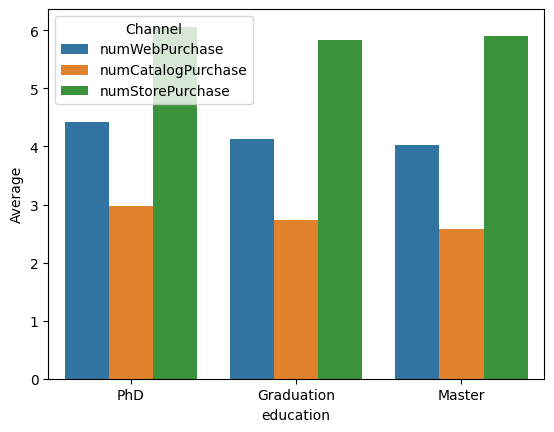

In [717]:
purchChannelEdu = dfStore.groupby('education')[['numWebPurchase','numCatalogPurchase','numStorePurchase']].mean().loc[topEdu].reset_index()
sns.barplot(data = purchChannelEdu.melt(id_vars = 'education',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'education',
            y = 'Average',
            hue = 'Channel')
purchChannelEdu

,statusMarital,numWebPurchase,numCatalogPurchase,numStorePurchase
0,Single,3.872917,2.600000,5.639583
1,Married,4.087963,2.625000,5.850694
2,Together,4.081034,2.675862,5.736207


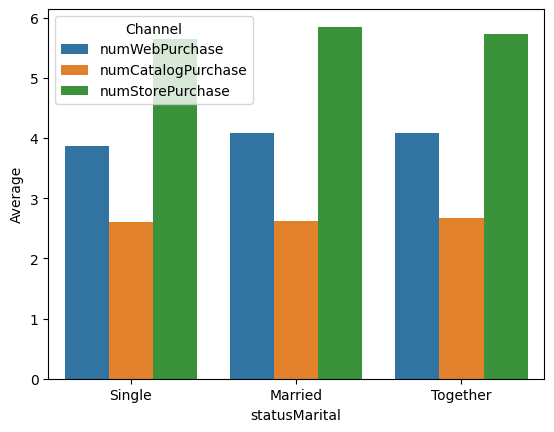

In [718]:
purchChannelMarital = dfStore.groupby('statusMarital')[['numWebPurchase','numCatalogPurchase','numStorePurchase']].mean().loc[topMarital].reset_index()
sns.barplot(data = purchChannelMarital.melt(id_vars = 'statusMarital',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'statusMarital',
            y = 'Average',
            hue = 'Channel')
purchChannelMarital

,ecoClass,numWebPurchase,numCatalogPurchase,numStorePurchase
0,Lower Middle Class,4.763409,3.331943,6.72944
1,Working Class,1.956612,0.419421,3.03719


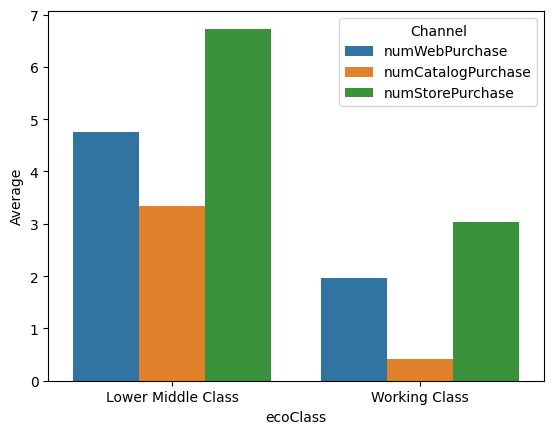

In [719]:
purchChannelEco = dfStore.groupby('ecoClass')[['numWebPurchase','numCatalogPurchase','numStorePurchase']].mean().loc[topEco].reset_index()
sns.barplot(data = purchChannelEco.melt(id_vars = 'ecoClass',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'ecoClass',
            y = 'Average',
            hue = 'Channel')
purchChannelEco

,isFamily,numWebPurchase,numCatalogPurchase,numStorePurchase
0,Family,3.961923,1.827091,5.202871
1,Not Family,4.393417,4.758621,7.264890


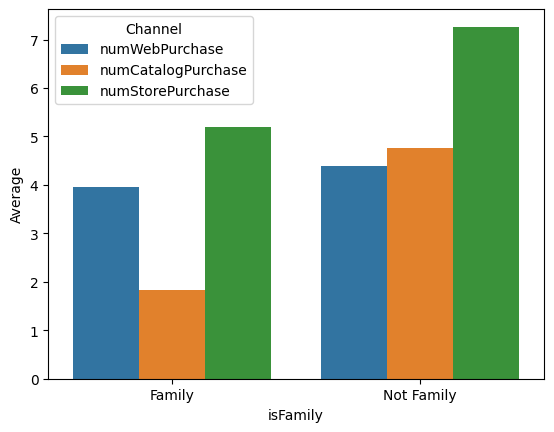

In [720]:
purchChannelFam = dfStore.groupby('isFamily')[['numWebPurchase','numCatalogPurchase','numStorePurchase']].mean().reset_index()
sns.barplot(data = purchChannelFam.melt(id_vars = 'isFamily',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'isFamily',
            y = 'Average',
            hue = 'Channel')
purchChannelFam

**Despite all demography classes, all favorites Store as channel of purchase.**  
Then followed by Web as their second choice of purchase channel.

It means, we should mainly boost the campaign in store to attract more participant.  
Then, if we have enough budget we can also consider web as secondary channel to boost our campaign.

The grand design should still match the highest demography pool as always mentioned before.

# **OVERALL CONCLUSION AND RECOMMENDATION**

## **Evaluation**

Based on demographic analysis (proportion and rate of participation), we know that the past campaigns did catch or focus more on:
1. Generation: Millennials
2. Education: PhD
3. Marital: Single
4. Economic Class: Lower Middle Class
5. Family: Not Family

We also couldn't find what makes the 2nd campaign failed and last campaign successful because the pattern of the demography is quite similar from campaign to campaign.

Based on discount analysis, discount might needed because almost everyone has ever bought in discount.  
But, the ratio to purchase in total, the number is small 19% / 1 out of 5 purchase were made in discount (even in every type of demography).  
Only by category Working Class (1 out of 3 purchase) and Family (1 out of 4 purchase) who ever bought more in discount.  
It could be because the discounted items didn't match the needs of the counsumer (only attracts Working Class and Family).  
Meanwhile, Working Class is not the highest population among other Economic Classes.

Based on channel of purchase analysis, we find that despite of demography types, all most favored channel of purchase is Store, followed by Web.


## **Conclusion**

Based on demographic analysis, we find that some categories has higher proportion of population than others.

**The Highest Proportion of Population**
1. Lower Middle Class (75%)
2. Family (72%)
3. Couple - Married (39%) and Together (26%) = (65%)
4. Graduation (50%)
5. Gen X (48%)

**Again, these categories are the most potential to be targeted if we want larger audience**  
But we should have priority of which demography type we should aim more in the campaign and the priority is also ranked up in list above.  
Because, if we combined those all (equally), we only get 132 participants at most. But still those combination is the highest among other combinations.

Discount can also be used to attract or target more participant because almost everyone has ever bought in discount.

Channel of purchase, despite of demography types, all favored Store as their main channel of purchase.

## **Recommendation**

Based on our correlation test, it proves that higher population will contributes more participant.  
Thus, we should aim for biggest population to catch more participant as our audience. The list has been mentioned before in conclusion.

Our main audience should be the **Lower Middle Class**, who has **Family** (kids / teens in home). We can also add touch of other demography types like **Couple** (Married and Together), **Graduation**, and **Gen X** to enhance our campaign more.

The discounted items should also meet the needs of our audience above, especially **Lower Middle Class** who has **Family** (kids / teens in home).

We should boost our campaign especially in **Store**.  
Then, we can consider to also boost it at our **Web** as our secondary channel of purchase if we have enough budget.